# Part 1: Data Prepossessing

In [161]:
import pandas as pd

# URLs of the CSV files (which are saved into my personal GitHub)
train_url = "https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Assignment%201/train.csv"

# Load the CSV files directly from the URLs
train_data = pd.read_csv(train_url, delimiter=';')

# Display the first few rows of each dataset
print("\nTrain data:")
print(train_data.head())


Train data:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


    Because the test_data was randomly selected from the train_data, we will only use the train_data and conduct the train-test split later, in order to avoid the repetition of observations.

1. Check the basic information of the dataset

In [162]:
print("Shape of train_data:", train_data.shape)
print("\nColumns of train_data:", train_data.columns.tolist())
print("\nInfo of train_data:")
train_data.info()
print("\nHead of train_data:")
print(train_data.head())
print("\nTail of train_data:")
print(train_data.tail())

Shape of train_data: (45211, 17)

Columns of train_data: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Info of train_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   4521

2. Check the data imbalance


Training Data Imbalance:
     Count  Percentage
y                     
no   39922    88.30152
yes   5289    11.69848
Imbalance Ratio: 7.55


C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\2101750505.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)",


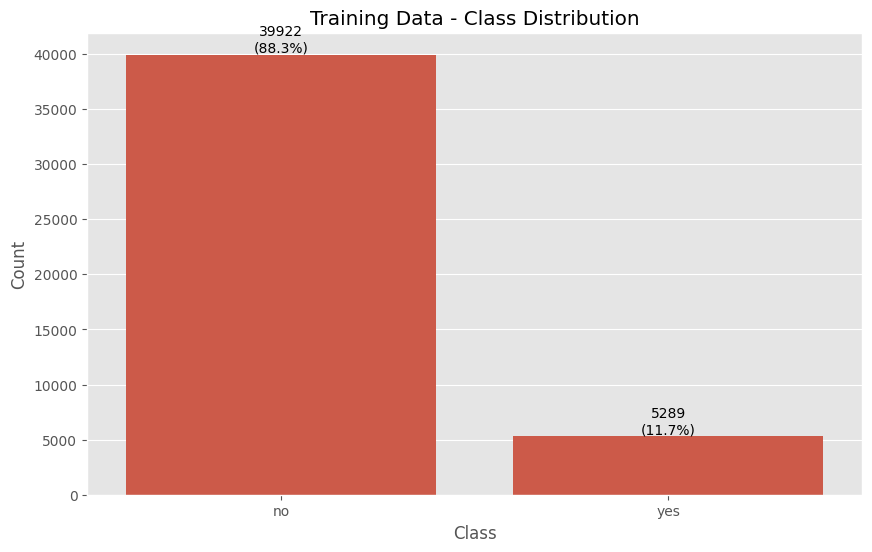

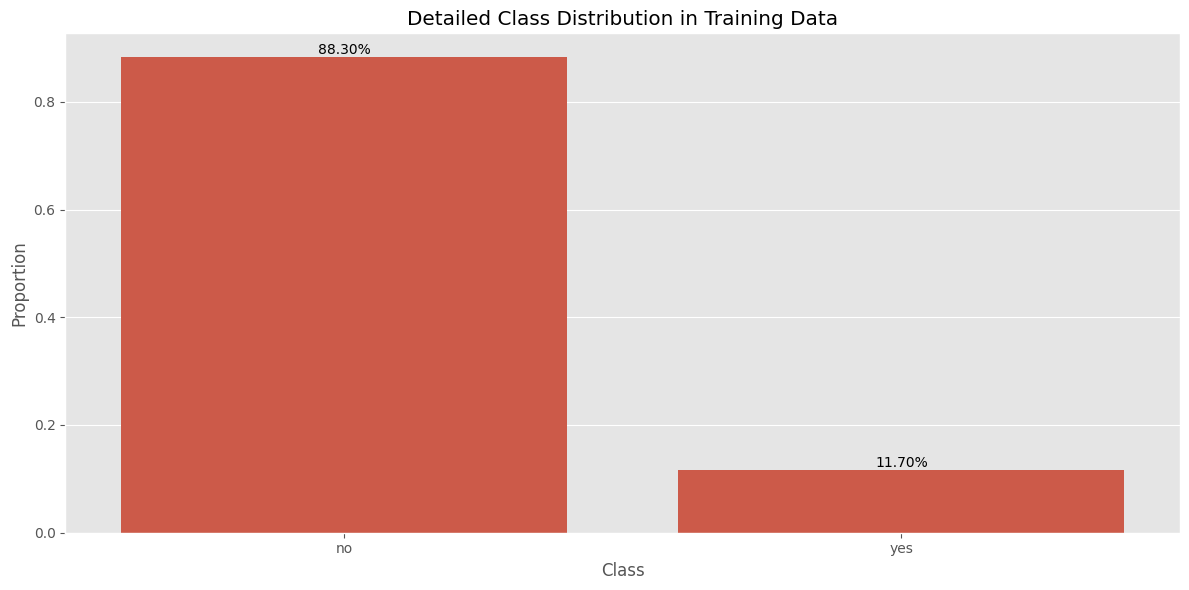


Detailed Training Data Statistics:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Total number of samples: 45211


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_imbalance(data, title):
    # Count the occurrences of each class
    class_counts = data['y'].value_counts()
    
    # Calculate percentages
    class_percentages = 100 * class_counts / len(data)
    
    # Create a DataFrame for easy printing
    imbalance_df = pd.DataFrame({
        'Count': class_counts,
        'Percentage': class_percentages
    })
    
    print(f"\n{title} Data Imbalance:")
    print(imbalance_df)
    
    # Calculate imbalance ratio
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"Imbalance Ratio: {imbalance_ratio:.2f}")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=class_counts.index, y=class_counts.values)
    plt.title(f"{title} Data - Class Distribution")
    plt.xlabel('Class')
    plt.ylabel('Count')
    
    # Add value labels on the bars
    for i, v in enumerate(class_counts.values):
        plt.text(i, v, f"{v}\n({class_percentages[i]:.1f}%)", 
                 ha='center', va='bottom')
    
    plt.show()

# Check imbalance for train data
check_imbalance(train_data, "Training")

# Plotting detailed distribution
plt.figure(figsize=(12, 6))
train_distribution = train_data['y'].value_counts(normalize=True)
sns.barplot(x=train_distribution.index, y=train_distribution.values)
plt.title('Detailed Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
for i, val in enumerate(train_distribution):
    plt.text(i, val, f'{val:.2%}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Training Data Statistics:")
print(train_data['y'].value_counts(normalize=True))
print("\nTotal number of samples:", len(train_data))

    This dataset exhibits a significant imbalance. We need to consider this factor when conducting further testing and modelling.

3. Check missing values

In [164]:
# Check for missing values in train_data and test_data
missing_values_train = train_data.isnull().sum()
print(missing_values_train)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


    No missing data in this dataset.

In [165]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


4. Explore Categorical Features

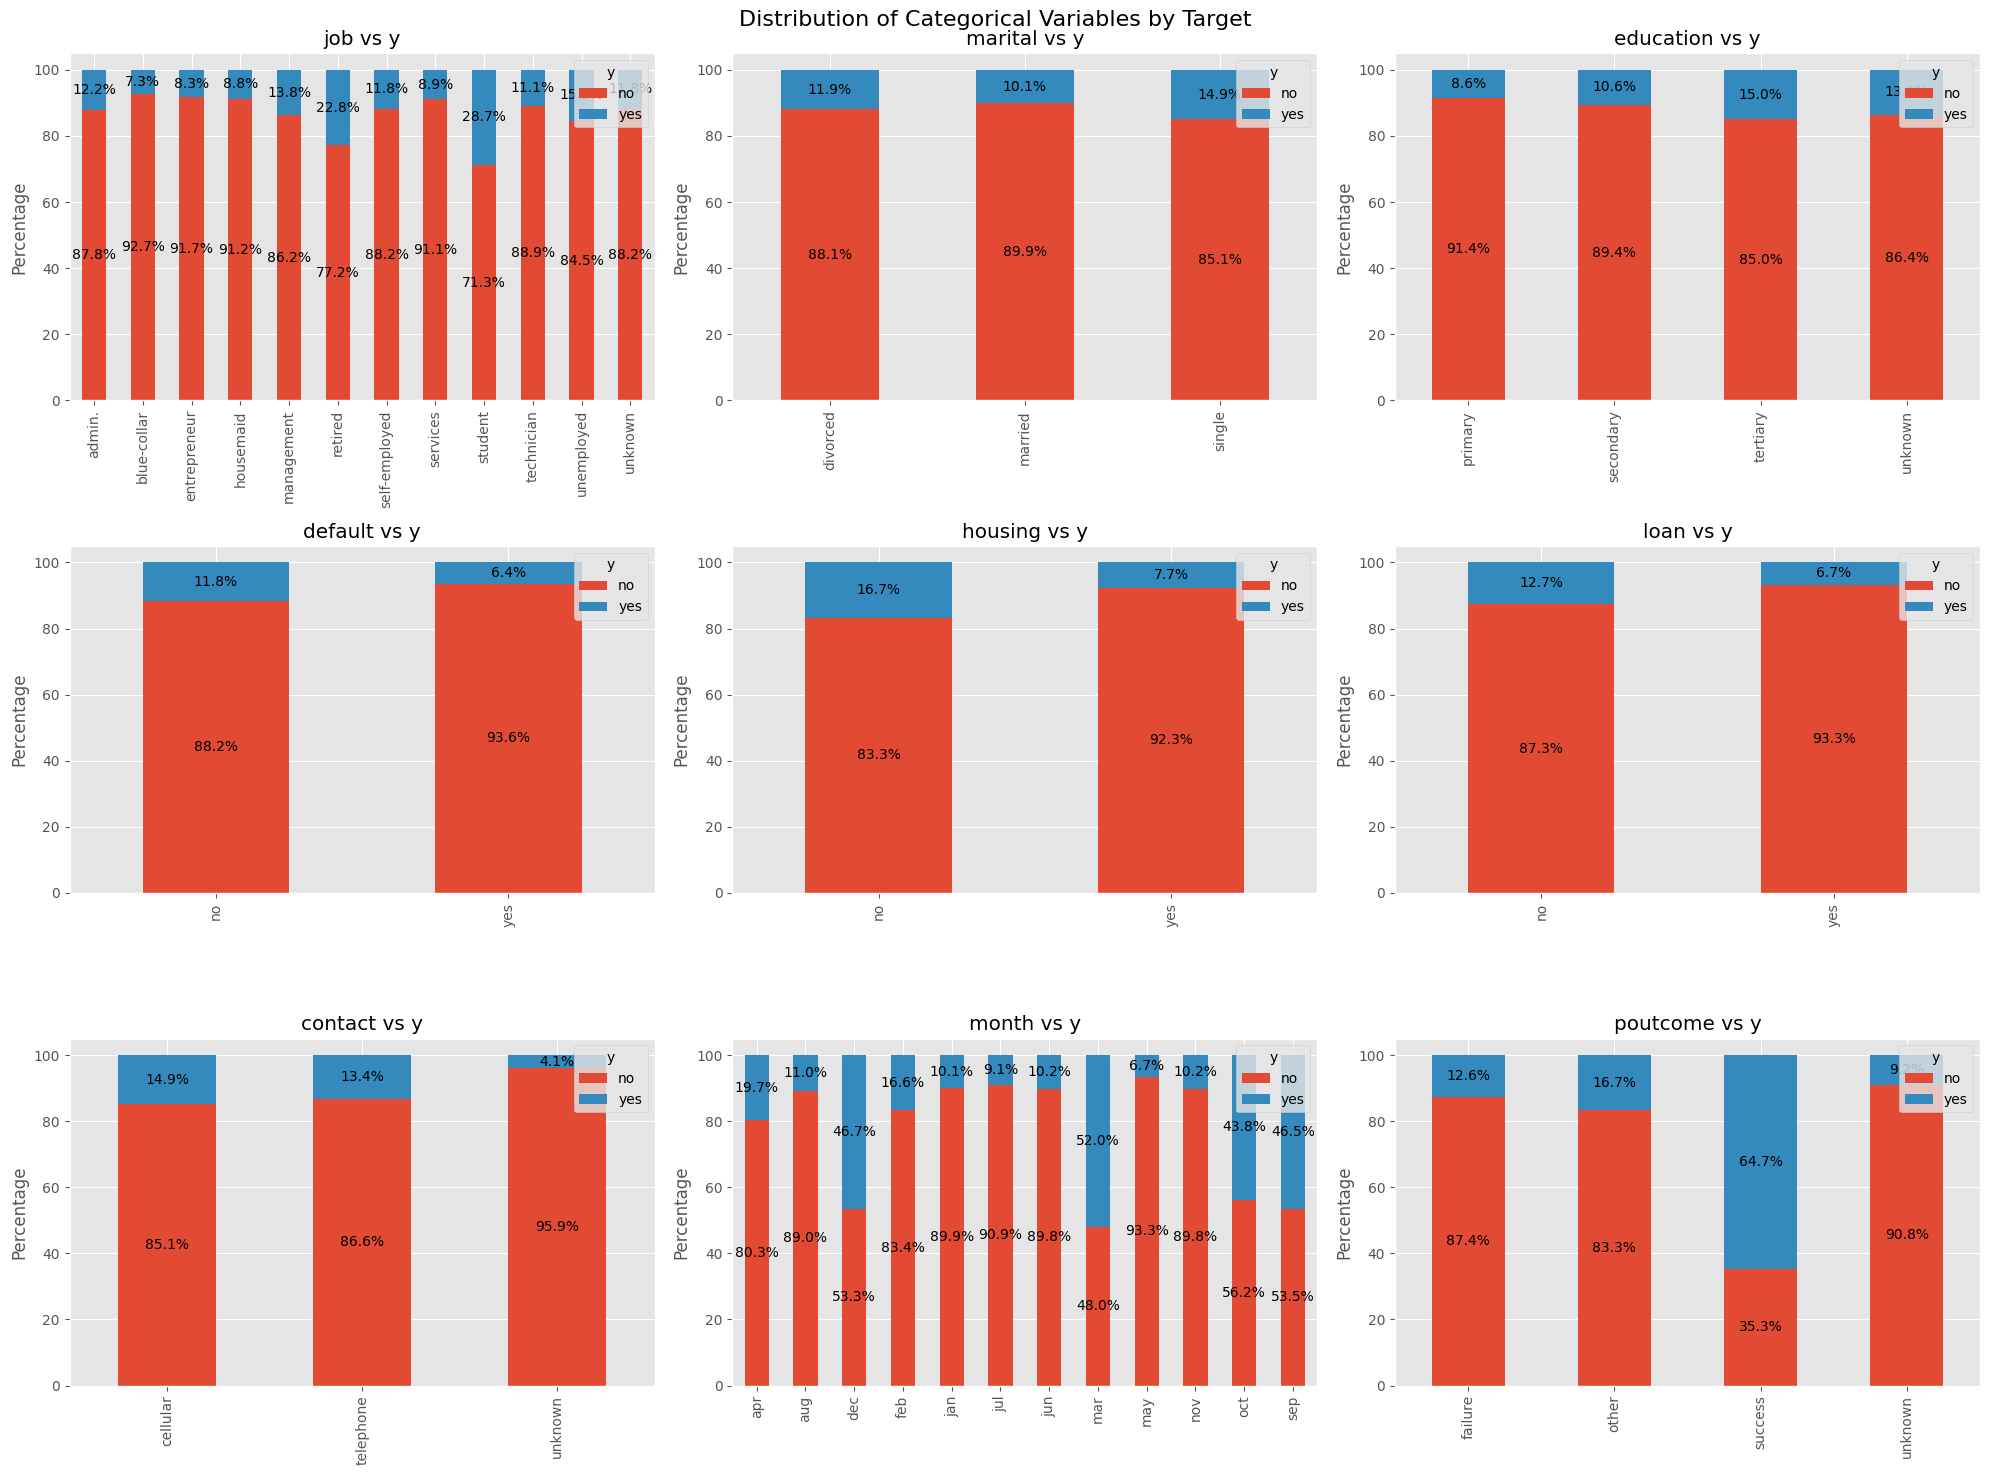

In [166]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 3
n_rows = (len(categorical_cols) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Distribution of Categorical Variables by Target', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Create histograms
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    # Calculate percentage distributions
    pct_data = train_data.groupby(col)['y'].value_counts(normalize=True).unstack()
    pct_data = pct_data.mul(100)
    
    # Plot stacked bar chart
    pct_data.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title(f'{col} vs y')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage')
    ax.legend(title='y', loc='upper right')
    
    # Add percentage labels
    for c in ax.containers:
        ax.bar_label(c, fmt='%.1f%%', label_type='center')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

    Based on the histograms generated, we observe that categorical features such as job, marital, education, default, housing, loan, month, and 'poutcome' display noticable variations in their relationships with the target variable 'y'. 

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\3023903795.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

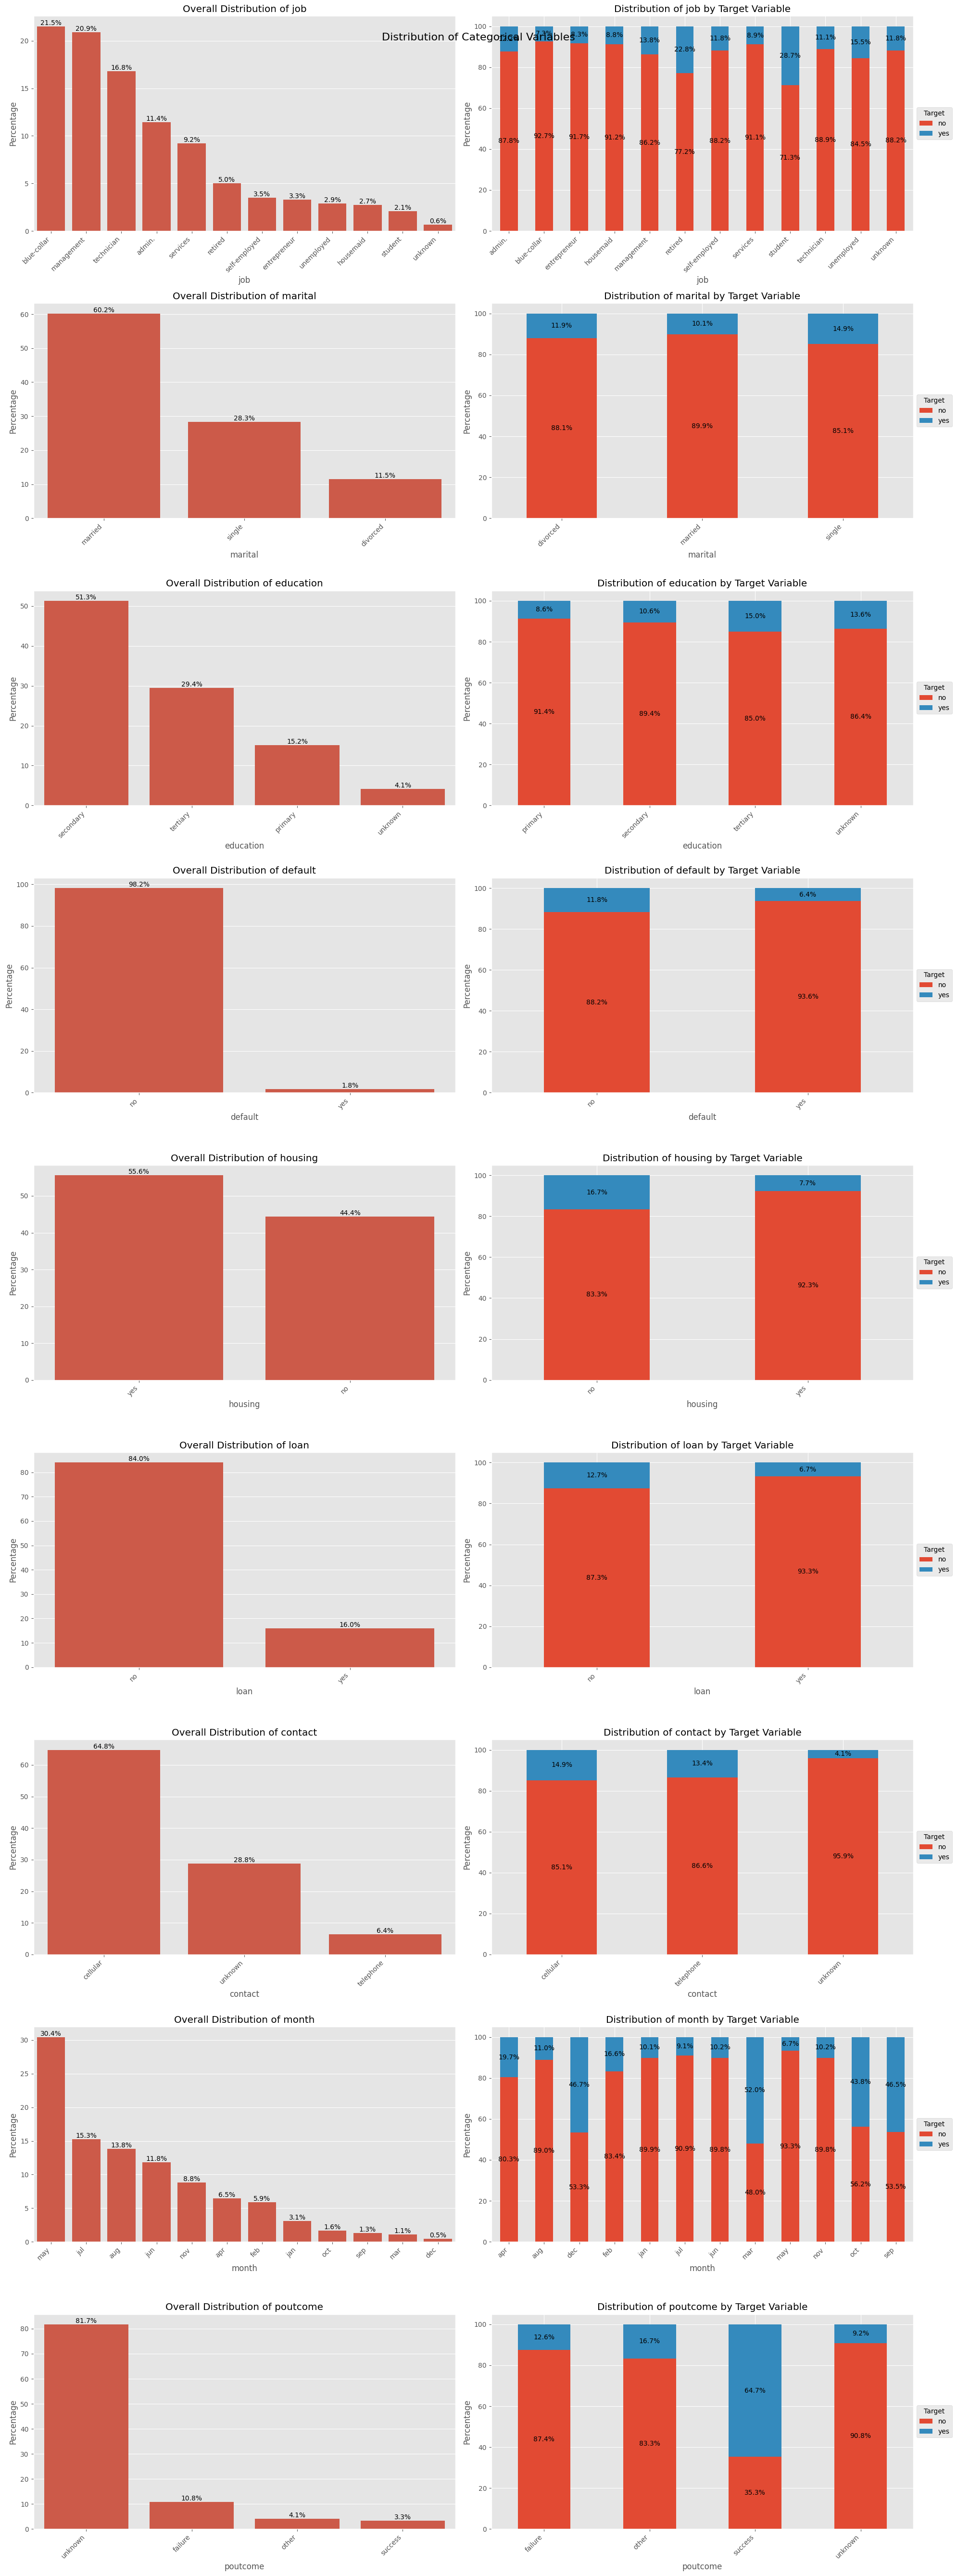


Detailed statistics for job:
Overall distribution:
  blue-collar: 21.53%
  management: 20.92%
  technician: 16.80%
  admin.: 11.44%
  services: 9.19%
  retired: 5.01%
  self-employed: 3.49%
  entrepreneur: 3.29%
  unemployed: 2.88%
  housemaid: 2.74%
  student: 2.07%
  unknown: 0.64%

Distribution by target variable:
y                     no        yes
job                                
admin.         87.797331  12.202669
blue-collar    92.725031   7.274969
entrepreneur   91.728312   8.271688
housemaid      91.209677   8.790323
management     86.244449  13.755551
retired        77.208481  22.791519
self-employed  88.157061  11.842939
services       91.116996   8.883004
student        71.321962  28.678038
technician     88.943004  11.056996
unemployed     84.497314  15.502686
unknown        88.194444  11.805556


Detailed statistics for marital:
Overall distribution:
  married: 60.19%
  single: 28.29%
  divorced: 11.52%

Distribution by target variable:
y                no        yes


In [167]:
# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Remove target variable from the list

# Set up the plot
n_cols = 2
n_rows = len(categorical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

# Create plots for each categorical variable
for i, col in enumerate(categorical_cols):
    # Overall distribution
    ax1 = axes[i, 0]
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    sns.barplot(x=overall_dist.index, y=overall_dist.values, ax=ax1)
    ax1.set_title(f'Overall Distribution of {col}')
    ax1.set_ylabel('Percentage')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Add percentage labels
    for j, v in enumerate(overall_dist.values):
        ax1.text(j, v, f'{v:.1f}%', ha='center', va='bottom')

    # Distribution by target variable
    ax2 = axes[i, 1]
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    target_dist.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title(f'Distribution of {col} by Target Variable')
    ax2.set_ylabel('Percentage')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    ax2.legend(title='Target', loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Add percentage labels
    for c in ax2.containers:
        ax2.bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
for col in categorical_cols:
    print(f"\nDetailed statistics for {col}:")
    
    # Overall distribution
    overall_dist = train_data[col].value_counts(normalize=True) * 100
    print("Overall distribution:")
    for category, percentage in overall_dist.items():
        print(f"  {category}: {percentage:.2f}%")
    
    # Distribution by target variable
    target_dist = pd.crosstab(train_data[col], train_data['y'], normalize='index') * 100
    print("\nDistribution by target variable:")
    print(target_dist)
    print("\n" + "="*50)

    The graphs above indicate a significant data imbalance in certain features, such as month and poutcome. This imbalance could result in significant variance due to insufficient data. Therefore, it's important to focus on features with a more balanced distribution of data, such as housing, education, contact and job.
    We will further examine the statistical significance of these variations.  

In [168]:
# Chi-Square Test
from scipy.stats import chi2_contingency

# List of selected categorical features
selected_features = ['education', 'housing', 'contact','job']

# Function to perform chi-square test
def chi_square_test(data, feature, target):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    return chi2, p_value

# Perform chi-square tests and store results
results = []
for feature in selected_features:
    chi2, p_value = chi_square_test(train_data, feature, 'y')
    results.append({'Feature': feature, 'Chi-Square': chi2, 'P-value': p_value})

# Convert results to DataFrame and sort by chi-square value
results_df = pd.DataFrame(results).sort_values('Chi-Square', ascending=False)

# Print results
print("Chi-Square Test Results:")
print(results_df.to_string(index=False))

Chi-Square Test Results:
  Feature  Chi-Square       P-value
  contact 1035.714225 1.251738e-225
  housing  874.822449 2.918798e-192
      job  836.105488 3.337122e-172
education  238.923506  1.626656e-51


    
    Based on the chi-square test results, all selected categorical features show a statitically significant difference when compared with 'y'. For the computational simplicity, 'job' will not be used in the models as a feature.

5. Explore Numerical Features

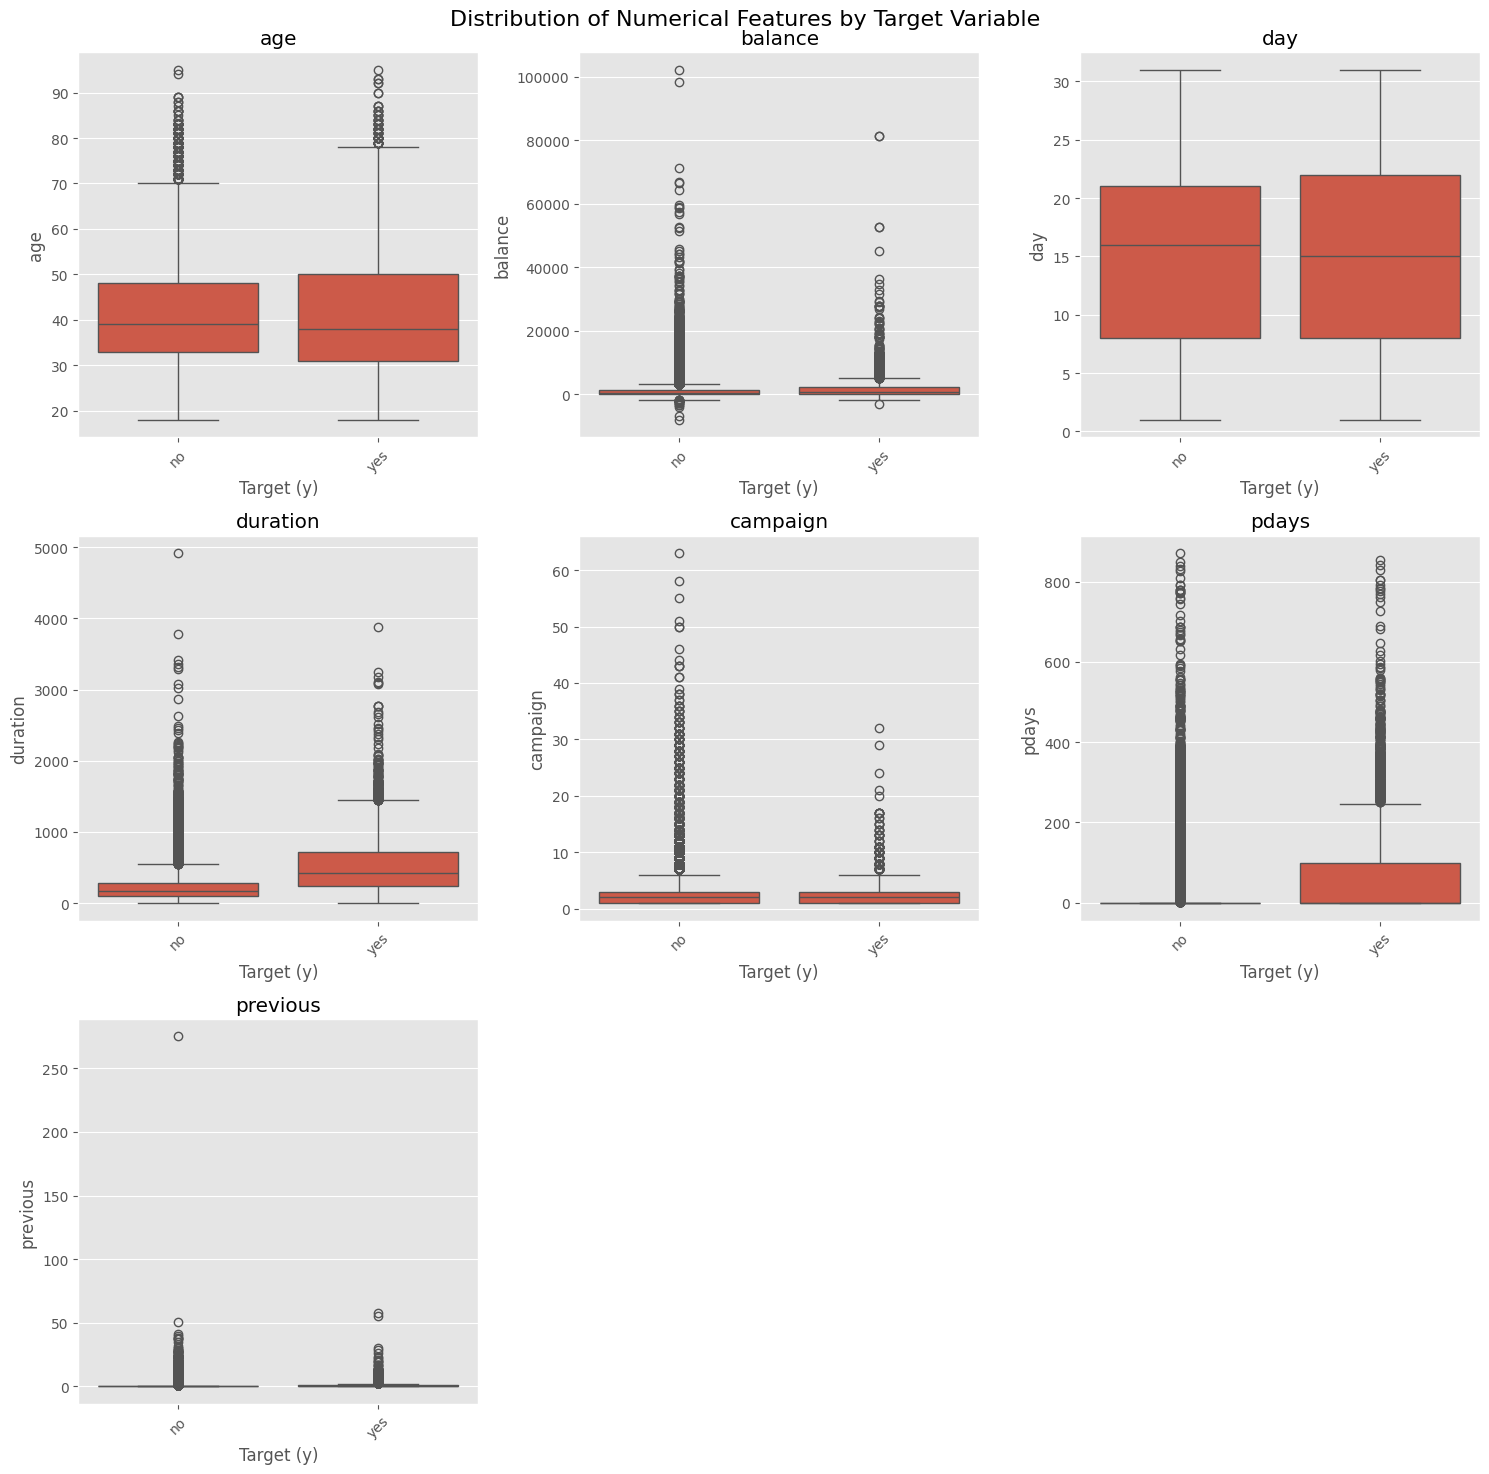


Summary Statistics for Numerical Features:

age:
       count       mean        std   min   25%   50%   75%   max
y                                                               
no   39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0
yes   5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0

balance:
       count         mean          std     min    25%    50%     75%       max
y                                                                             
no   39922.0  1303.714969  2974.195473 -8019.0   58.0  417.0  1345.0  102127.0
yes   5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0  2159.0   81204.0

day:
       count       mean       std  min  25%   50%   75%   max
y                                                            
no   39922.0  15.892290  8.294728  1.0  8.0  16.0  21.0  31.0
yes   5289.0  15.158253  8.501875  1.0  8.0  15.0  22.0  31.0

duration:
       count        mean         std  min    25%    50%    75%     max
y                           

In [169]:
# Boxplots for all numerical features
import numpy as np

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows and columns for the subplot grid
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features by Target Variable', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create boxplots
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='y', y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('Target (y)')
    axes[i].set_ylabel(feature)
    
    # Rotate x-axis labels if they're overlapping
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Numerical Features:")
for feature in numerical_features:
    print(f"\n{feature}:")
    print(train_data.groupby('y')[feature].describe())

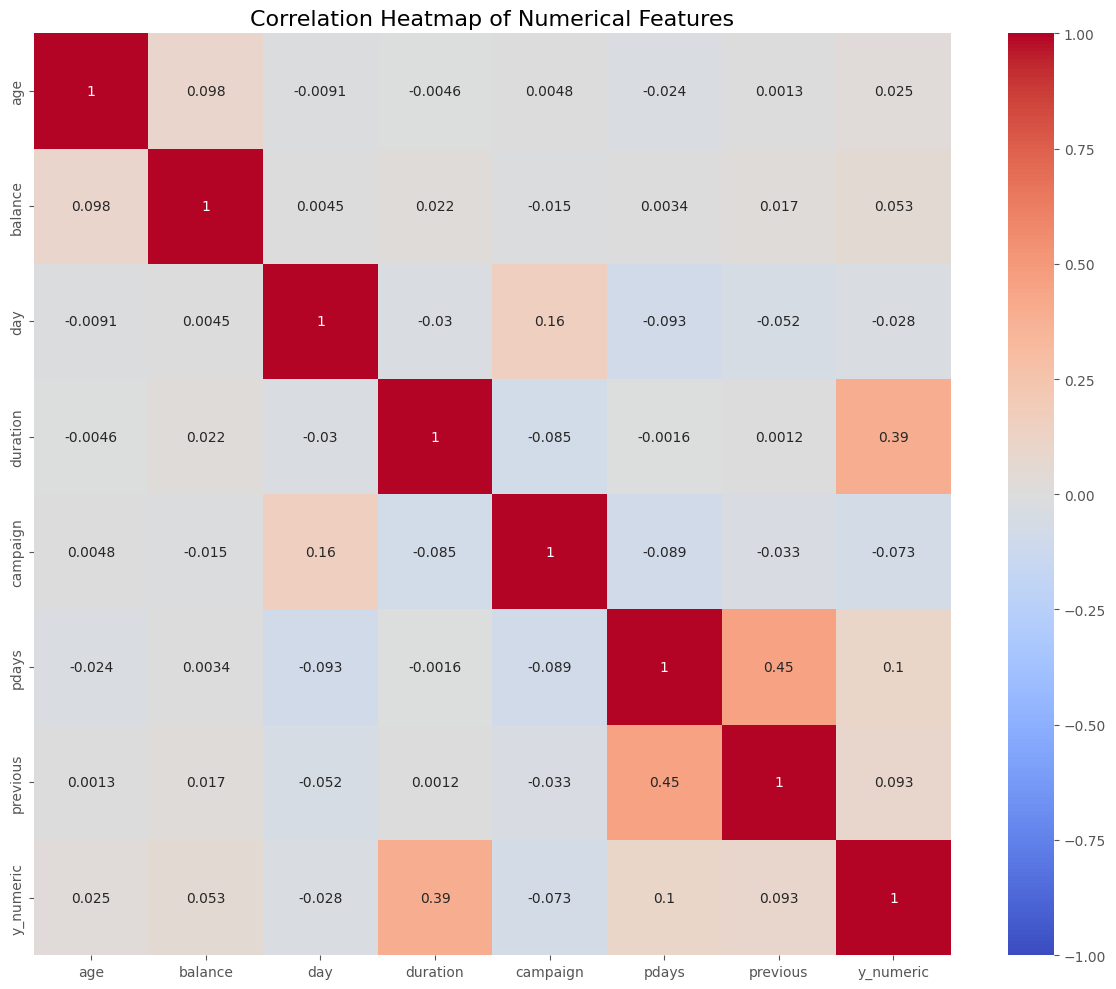


Correlations with target variable ('y'):
y_numeric    1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
balance      0.052838
age          0.025155
day         -0.028348
campaign    -0.073172
Name: y_numeric, dtype: float64


In [170]:
# Heatmap for all numerical features

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Ensure 'y' is included in the correlation matrix
if 'y' not in numerical_features:
    # Convert 'y' to numeric (assuming 'yes' = 1, 'no' = 0)
    train_data['y_numeric'] = (train_data['y'] == 'yes').astype(int)
    numerical_features.append('y_numeric')

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the correlation values with 'y' or 'y_numeric'
target_col = 'y_numeric' if 'y_numeric' in numerical_features else 'y'
correlations_with_target = correlation_matrix[target_col].sort_values(ascending=False)
print("\nCorrelations with target variable ('y'):")
print(correlations_with_target)

    Based on the heatmap generated, we observe that numerical features such as 'duration', 'pdays', 'campaign', 'balance' and 'previous' display noticable correlations in their relationships with the target variable 'y'. 
    We then will further explore the distribution of these numerical distributions.
    We need to further examine the statistical significance of those correlations.

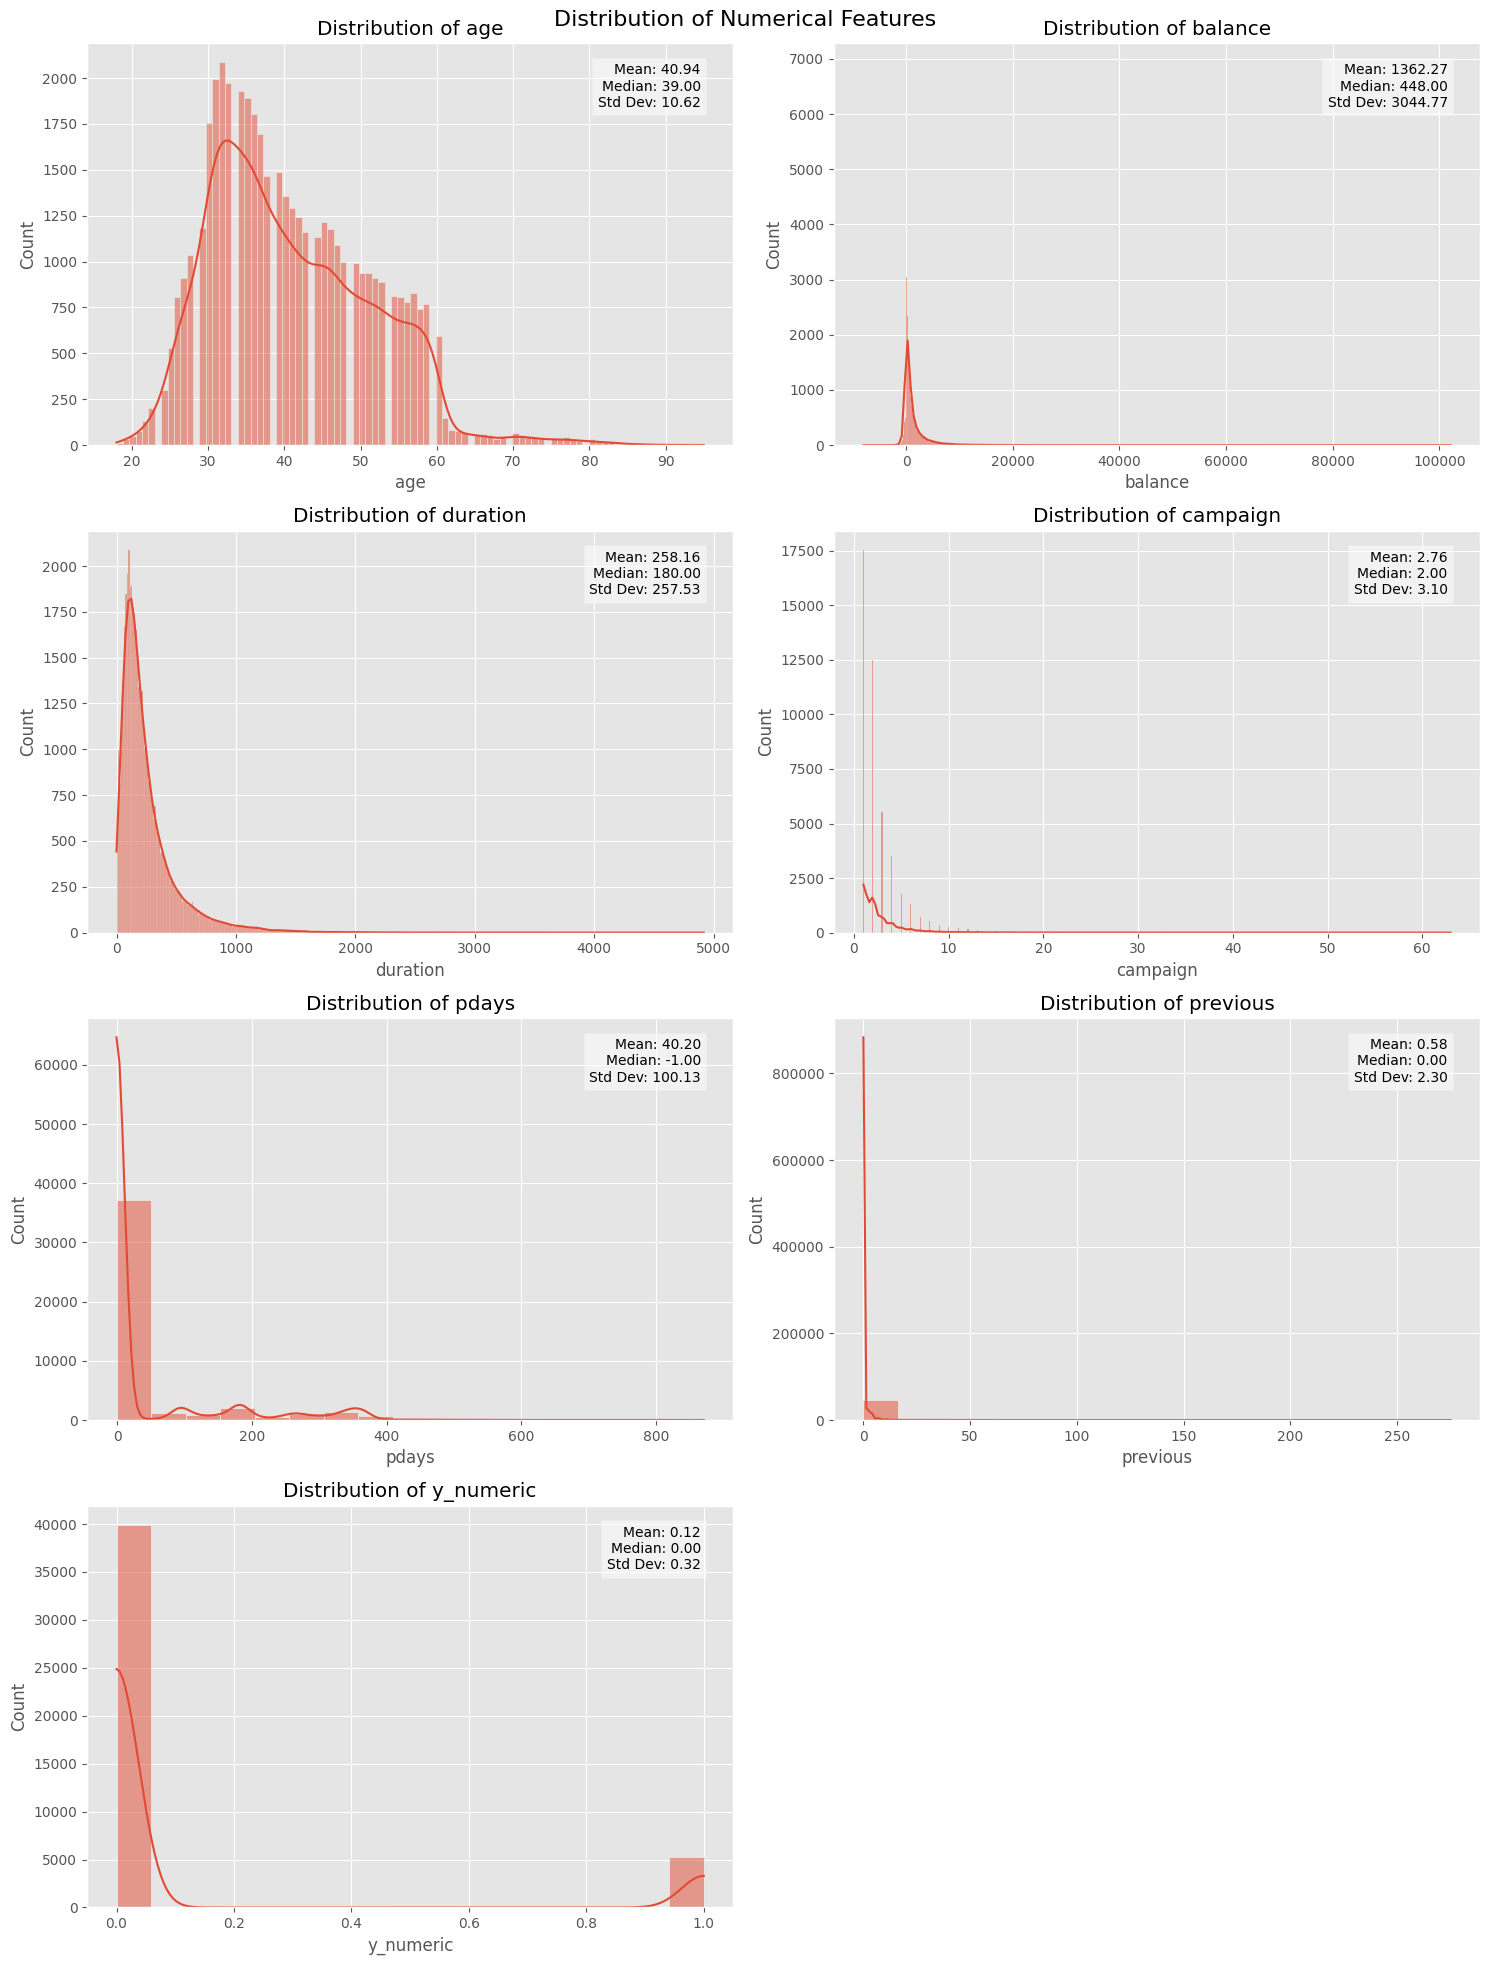


Detailed statistics for numerical features:

Statistics for age:
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Value counts:
age
32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
36    3.994603
30    3.886222
37    3.751299
39    3.289023
38    3.242574
Name: proportion, dtype: float64

Statistics for balance:
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Value counts:
balance
0     7.772445
1     0.431311
2     0.345049
4     0.307447
3     0.296388
5     0.249939
6     0.194643
8     0.179160
23    0.165889
7     0.152618
Name: proportion, dtype: float64

Statistics for duration:
count    45211.000000
mean       258.163080
std        257.

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_features = train_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'day' and 'y' (if present) from numerical features
numerical_features = [col for col in numerical_features if col not in ['day', 'y']]

# Set up the plot
n_features = len(numerical_features)
n_cols = 2
n_rows = (n_features + 1) // 2  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Create histograms
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Plot histogram
    sns.histplot(train_data[feature], kde=True, ax=ax)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    # Add summary statistics
    mean = train_data[feature].mean()
    median = train_data[feature].median()
    std = train_data[feature].std()
    
    stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd Dev: {std:.2f}'
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed statistics for numerical features:")
for feature in numerical_features:
    print(f"\nStatistics for {feature}:")
    print(train_data[feature].describe())
    print("\nValue counts:")
    print(train_data[feature].value_counts(normalize=True).head(10) * 100)
    print("="*50)

In [172]:
# T-Test
from scipy import stats

# List of selected numerical features
selected_features = ['duration', 'campaign','balance','pdays']

# Function to perform t-test
def perform_t_test(data, feature, target):
    group1 = data[data[target] == 'yes'][feature]
    group2 = data[data[target] == 'no'][feature]
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return t_stat, p_value

# Perform t-tests and store results
results = []
for feature in selected_features:
    t_stat, p_value = perform_t_test(train_data, feature, 'y')
    mean_yes = train_data[train_data['y'] == 'yes'][feature].mean()
    mean_no = train_data[train_data['y'] == 'no'][feature].mean()
    results.append({
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Mean (y=yes)': mean_yes,
        'Mean (y=no)': mean_no
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results
print("T-Test Results:")
print(results_df.to_string(index=False))

T-Test Results:
 Feature  T-statistic       P-value  Mean (y=yes)  Mean (y=no)
duration    91.289436  0.000000e+00    537.294574   221.182806
campaign   -15.599949  1.012347e-54      2.141047     2.846350
 balance    11.250434  2.521114e-29   1804.267915  1303.714969
   pdays    22.151672 3.790553e-108     68.702968    36.421372


    Based on the t-test results, all selected numerical features show a statistically significant correlatoin when compared with 'y'.

6. Create the prepocessing pipeline

In [173]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn

# Select features
numerical_features = ['duration', 'campaign', 'balance', 'pdays']
categorical_features = ['contact', 'housing', 'education']

# Separate features and target
X = train_data[numerical_features + categorical_features]
y = train_data['y']

# Check scikit-learn version and create appropriate OneHotEncoder
sklearn_version = sklearn.__version__
if sklearn_version >= '0.23.0':
    onehot = OneHotEncoder(drop='first', sparse_output=False)
else:
    onehot = OneHotEncoder(drop='first', sparse=False)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', onehot, categorical_features)
    ])

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
onehot_encoder = preprocessor.named_transformers_['cat']
if hasattr(onehot_encoder, 'get_feature_names_out'):
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
else:
    cat_feature_names = onehot_encoder.get_feature_names(categorical_features)
feature_names = numerical_features + list(cat_feature_names)

# Create a new dataframe with preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display info about the preprocessed data
print("Shape of preprocessed data:", X_preprocessed_df.shape)
print("\nFirst few rows of preprocessed data:")
print(X_preprocessed_df.head())

print("\nSummary statistics of preprocessed data:")
print(X_preprocessed_df.describe())

# Print feature names for later use
print("\nFeature names for model input:")
print(feature_names)

# Prepare final dataset with preprocessed features and target
final_train_data = X_preprocessed_df.copy()
final_train_data['target'] = y

print("\nFinal dataset shape:", final_train_data.shape)
print("\nFirst few rows of final dataset:")
print(final_train_data.head())

Shape of preprocessed data: (45211, 10)

First few rows of preprocessed data:
   duration  campaign   balance  pdays  contact_telephone  contact_unknown  \
0  0.053070       0.0  0.092259    0.0                0.0              1.0   
1  0.030704       0.0  0.073067    0.0                0.0              1.0   
2  0.015453       0.0  0.072822    0.0                0.0              1.0   
3  0.018707       0.0  0.086476    0.0                0.0              1.0   
4  0.040260       0.0  0.072812    0.0                0.0              1.0   

   housing_yes  education_secondary  education_tertiary  education_unknown  
0          1.0                  0.0                 1.0                0.0  
1          1.0                  1.0                 0.0                0.0  
2          1.0                  1.0                 0.0                0.0  
3          1.0                  0.0                 0.0                1.0  
4          0.0                  0.0                 0.0             

# Part 2: Build Baseline Models

1. Cross-validation for baseline models

In [174]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
import numpy as np

# Separate features and target
X = final_train_data.drop('target', axis=1)
y = final_train_data['target']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Perform initial train-test split
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to the training data
smoteenn = SMOTEENN(random_state=42)
X_train, y_train = smoteenn.fit_resample(X_train_imbalanced, y_train_imbalanced)

# Print class distributions
print("Original training set shape:", np.bincount(y_train_imbalanced))
print("Balanced training set shape:", np.bincount(y_train))
print("Test set shape:", np.bincount(y_test))

# Print shapes of final datasets
print("\nFinal shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("\nData preparation complete. X_train and y_train are now balanced and ready for model building.")

# Perform cross-validation
print("\nPerforming cross-validation:")

# Initialize models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

# Perform 5-fold cross-validation for Logistic Regression
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='f1')
print("Logistic Regression - Cross-validation F1 scores:", logreg_scores)
print("Logistic Regression - Mean F1 score:", logreg_scores.mean())
print("Logistic Regression - Standard deviation:", logreg_scores.std())

# Perform 5-fold cross-validation for KNN
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')
print("\nKNN - Cross-validation F1 scores:", knn_scores)
print("KNN - Mean F1 score:", knn_scores.mean())
print("KNN - Standard deviation:", knn_scores.std())

# Compare models
if logreg_scores.mean() > knn_scores.mean():
    print("\nLogistic Regression performs better in cross-validation.")
elif knn_scores.mean() > logreg_scores.mean():
    print("\nKNN performs better in cross-validation.")
else:
    print("\nBoth models perform equally in cross-validation.")

Original training set shape: [31970  4198]
Balanced training set shape: [23426 25534]
Test set shape: [7952 1091]

Final shapes:
X_train shape: (48960, 10)
y_train shape: (48960,)
X_test shape: (9043, 10)
y_test shape: (9043,)

Data preparation complete. X_train and y_train are now balanced and ready for model building.

Performing cross-validation:
Logistic Regression - Cross-validation F1 scores: [0.90049995 0.89705596 0.89402359 0.89946986 0.89399745]
Logistic Regression - Mean F1 score: 0.8970093614539774
Logistic Regression - Standard deviation: 0.0026917239148377793

KNN - Cross-validation F1 scores: [0.97875643 0.97709481 0.97733876 0.97807103 0.97445326]
KNN - Mean F1 score: 0.9771428561433353
KNN - Standard deviation: 0.00146558632724905

KNN performs better in cross-validation.


    In order to mitigate the data imbalance, we undersampled the majority class of the train data after the train-test split, while kept the test data untouched.

2.1 LogReg

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8986663796406059

Performance Scores:
Accuracy: 0.7668
Precision: 0.3218
Recall: 0.8423
F1 Score: 0.4657
ROC AUC Score: 0.8664


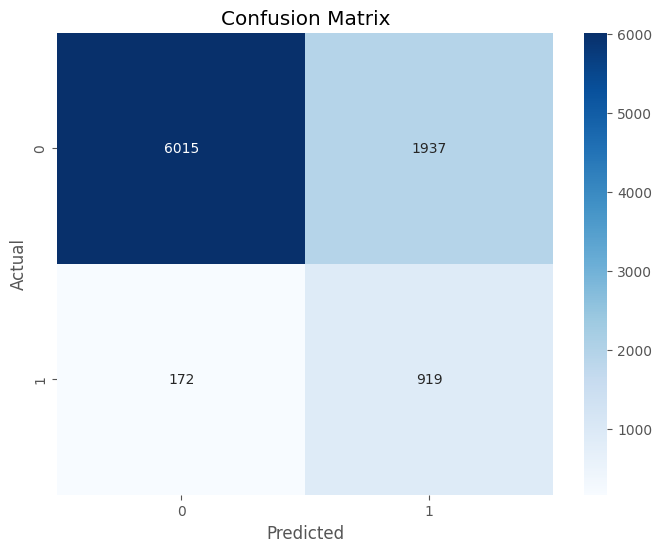


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      7952
           1       0.32      0.84      0.47      1091

    accuracy                           0.77      9043
   macro avg       0.65      0.80      0.66      9043
weighted avg       0.89      0.77      0.80      9043



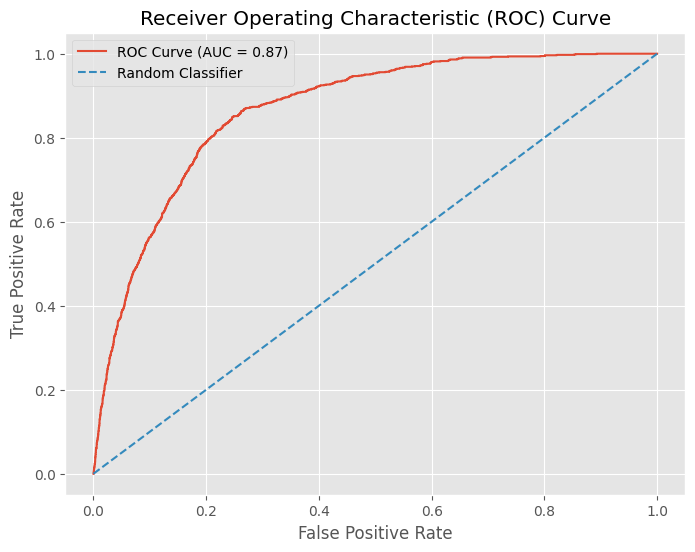


Timing Information:
Total time to run grid search: 4.77 seconds
Time per fit: 0.20 seconds

Top 10 most important features:
               feature  importance
0             duration   61.853935
1             campaign   20.356161
2              balance    6.930122
3                pdays    4.872942
5      contact_unknown    3.049889
6          housing_yes    2.078595
8   education_tertiary    1.236156
9    education_unknown    1.023880
7  education_secondary    0.679811
4    contact_telephone    0.400774


In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import time

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the grid search object
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logreg.predict(X_test)
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': abs(best_logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

2.2 LogReg (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.8012
Optimal F1 Score: 0.4962

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7952
           1       0.40      0.66      0.50      1091

    accuracy                           0.84      9043
   macro avg       0.67      0.76      0.70      9043
weighted avg       0.88      0.84      0.86      9043



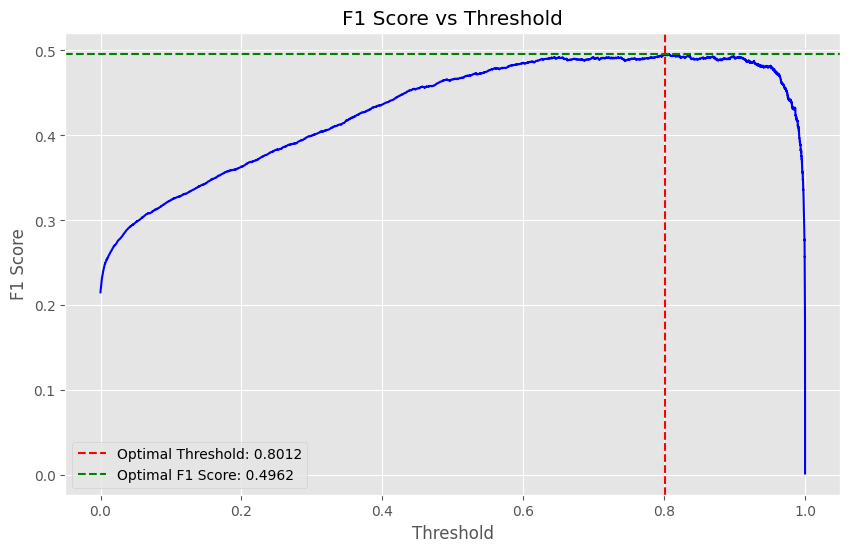

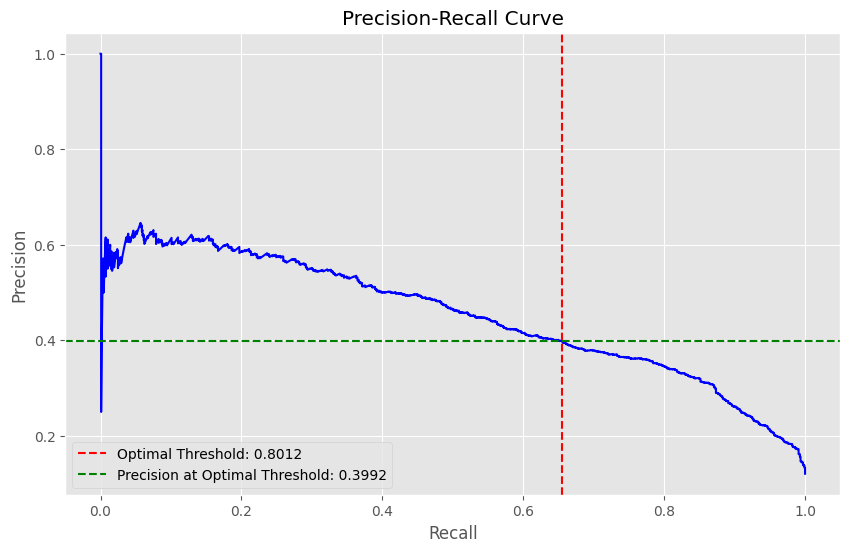


Default Threshold (0.5) F1 Score: 0.4657
Improvement in F1 Score: 0.0305

Metrics at threshold 0.5:
Accuracy: 0.7668
Precision: 0.3218
Recall: 0.8423
F1 Score: 0.4657
ROC AUC Score: 0.8664

Metrics at threshold 0.8011640264900054:
Accuracy: 0.8394
Precision: 0.3992
Recall: 0.6554
F1 Score: 0.4962
ROC AUC Score: 0.8664


In [176]:
from sklearn.metrics import f1_score, precision_recall_curve

# Get predicted probabilities
y_pred_proba = best_logreg.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
from sklearn.metrics import classification_report
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Calculate and print additional metrics for comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

3.1 KNN

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9898901014591257

Performance Scores:
Accuracy: 0.7831
Precision: 0.3283
Recall: 0.7626
F1 Score: 0.4590
ROC AUC Score: 0.8024


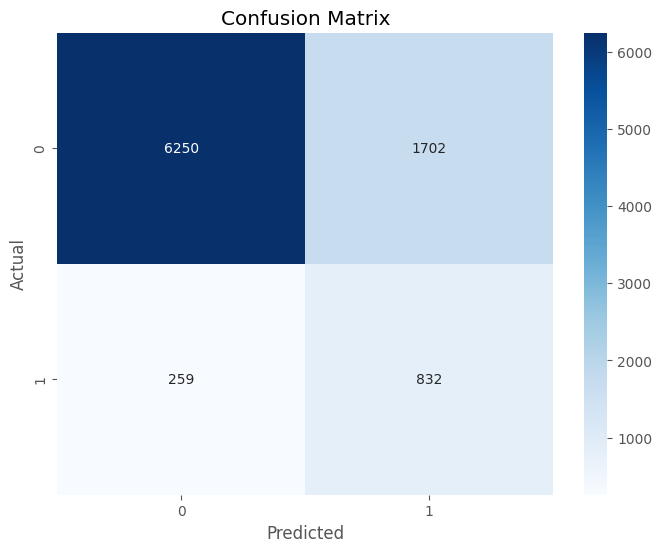


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      7952
           1       0.33      0.76      0.46      1091

    accuracy                           0.78      9043
   macro avg       0.64      0.77      0.66      9043
weighted avg       0.88      0.78      0.82      9043



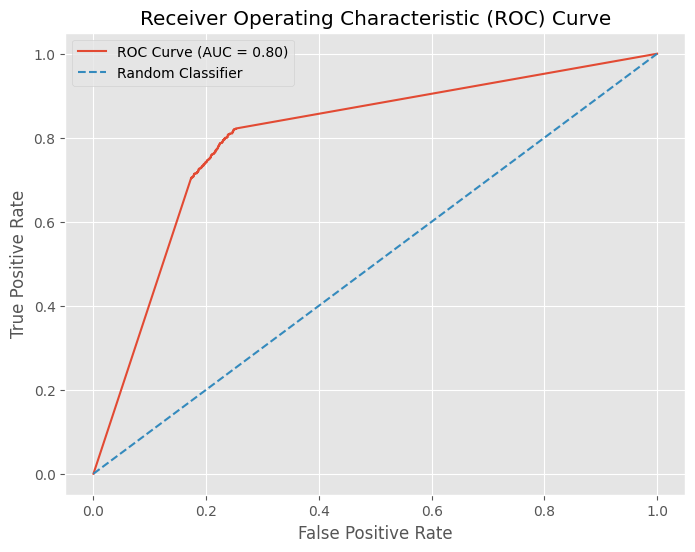


Timing Information:
Total time to run grid search: 39.09 seconds
Time per fit: 1.40 seconds

Top 10 potentially important features (based on feature scaling):
                                 feature  importance
education_secondary  education_secondary    0.499972
housing_yes                  housing_yes    0.499765
education_tertiary    education_tertiary    0.463405
contact_unknown          contact_unknown    0.419173
contact_telephone      contact_telephone    0.249648
education_unknown      education_unknown    0.204802
pdays                              pdays    0.126636
duration                        duration    0.070982
campaign                        campaign    0.045202
balance                          balance    0.025789


In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the grid search object
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Perform grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_fits = len(grid_search.cv_results_['mean_fit_time'])
time_per_fit = total_time / n_fits

print("\nTiming Information:")
print(f"Total time to run grid search: {total_time:.2f} seconds")
print(f"Time per fit: {time_per_fit:.2f} seconds")

# Feature Importance (for KNN, we'll use a simple method based on feature scaling)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.std(X_train, axis=0)  # Features with higher variance might be more important
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 potentially important features (based on feature scaling):")
print(feature_importance.head(10))

3.2 KNN (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.8395
Optimal F1 Score: 0.4747

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7952
           1       0.36      0.70      0.47      1091

    accuracy                           0.81      9043
   macro avg       0.66      0.77      0.68      9043
weighted avg       0.88      0.81      0.84      9043



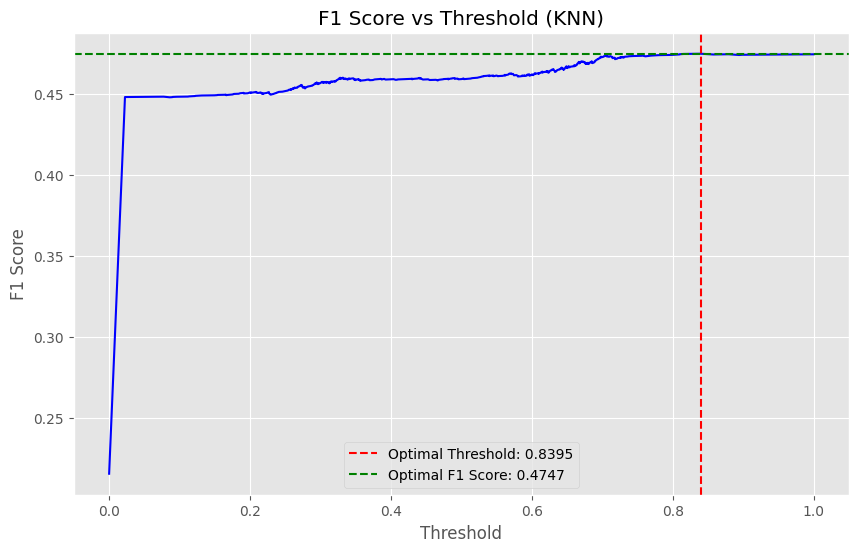

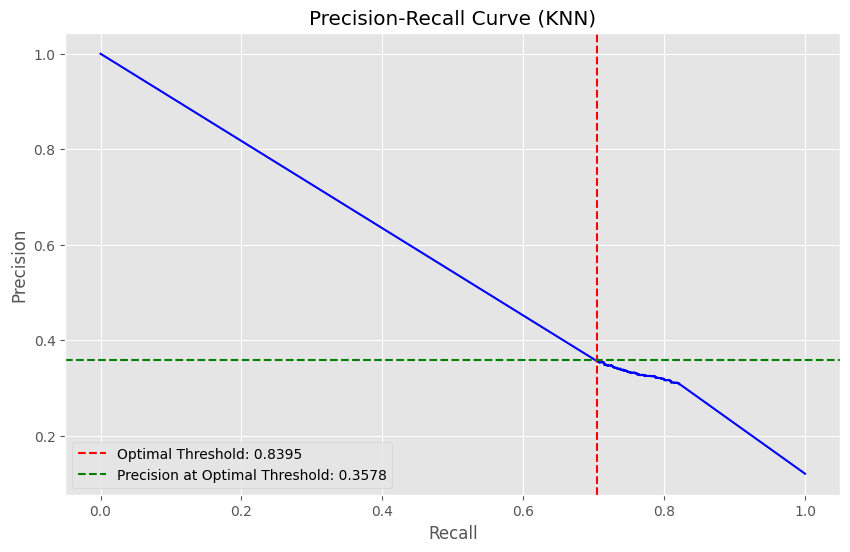


Default Threshold (0.5) F1 Score: 0.4590
Improvement in F1 Score: 0.0157

Metrics at threshold 0.5:
Accuracy: 0.7831
Precision: 0.3283
Recall: 0.7626
F1 Score: 0.4590
ROC AUC Score: 0.8024

Metrics at threshold 0.8395041930115592:
Accuracy: 0.8118
Precision: 0.3578
Recall: 0.7049
F1 Score: 0.4747
ROC AUC Score: 0.8024

Unable to visualize decision boundaries: more than 2 features present.


In [178]:
# Get predicted probabilities
y_pred_proba = best_knn.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (KNN)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (KNN)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Visualize decision boundaries (if possible)
if X_test.shape[1] == 2:  # Only if we have 2 features
    plt.figure(figsize=(10, 8))
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = best_knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
    plt.colorbar(scatter)
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("\nUnable to visualize decision boundaries: more than 2 features present.")

# Part 3: Ensemble Modelling

1. Cross-Validation for Emsemble Models

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

Cross-validation F1 Scores:
Random Forest: Mean = 0.9781, Std = 0.0016
AdaBoost: Mean = 0.9224, Std = 0.0048
Bagging: Mean = 0.9693, Std = 0.0030
Voting: Mean = 0.9749, Std = 0.0019


c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Test Set F1 Scores:
Random Forest: 0.4999
AdaBoost: 0.4922
Bagging: 0.4933
Voting: 0.4960


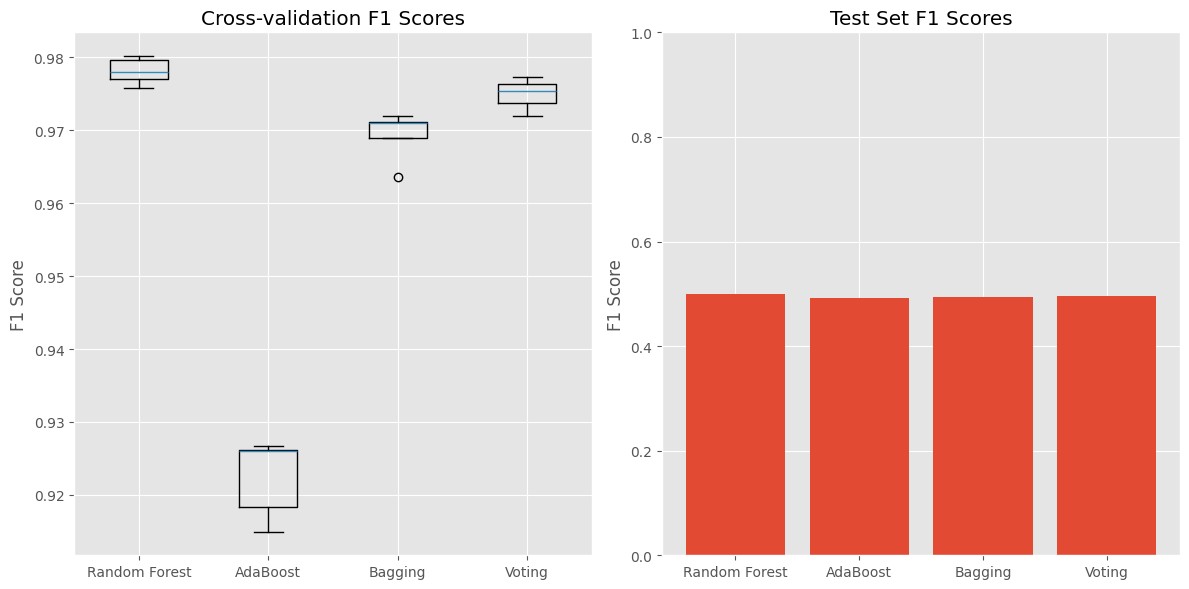


Best performing model: Random Forest

Top 10 important features for Random Forest:
               feature  importance
0             duration    0.560120
2              balance    0.108624
3                pdays    0.097710
5      contact_unknown    0.078393
1             campaign    0.070650
6          housing_yes    0.061163
8   education_tertiary    0.008515
7  education_secondary    0.006619
4    contact_telephone    0.004958
9    education_unknown    0.003249


In [179]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import __version__ as sklearn_version

# Initialize models
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)

# Check scikit-learn version for BaggingClassifier initialization
if sklearn_version >= '0.22':
    bag = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
else:
    bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

voting = VotingClassifier(estimators=[('rf', rf), ('ada', ada), ('bag', bag)], voting='soft')

models = [rf, ada, bag, voting]
model_names = ['Random Forest', 'AdaBoost', 'Bagging', 'Voting']

# Perform cross-validation
cv_scores = {}
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
    cv_scores[name] = scores

# Print cross-validation results
print("Cross-validation F1 Scores:")
for name, scores in cv_scores.items():
    print(f"{name}: Mean = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Train models on the entire training set and evaluate on test set
test_scores = {}
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_scores[name] = f1_score(y_test, y_pred)

print("\nTest Set F1 Scores:")
for name, score in test_scores.items():
    print(f"{name}: {score:.4f}")

# Visualize results
plt.figure(figsize=(12, 6))

# Plot cross-validation scores
plt.subplot(1, 2, 1)
plt.boxplot([cv_scores[name] for name in model_names], labels=model_names)
plt.title('Cross-validation F1 Scores')
plt.ylabel('F1 Score')

# Plot test set scores
plt.subplot(1, 2, 2)
plt.bar(model_names, [test_scores[name] for name in model_names])
plt.title('Test Set F1 Scores')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# Identify the best model based on test set performance
best_model_name = max(test_scores, key=test_scores.get)
best_model = models[model_names.index(best_model_name)]

print(f"\nBest performing model: {best_model_name}")

# Feature importance for the best model (if it's not Voting Classifier)
if best_model_name != 'Voting':
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop 10 important features for {best_model_name}:")
        print(feature_importance.head(10))
    else:
        print(f"\n{best_model_name} does not have built-in feature importance.")
else:
    print("\nVoting Classifier does not have a straightforward feature importance measure.")

2.1 Random Forest

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base

Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best cross-validation score: 0.9767762831254637

Performance Scores:
Accuracy: 0.8113
Precision: 0.3668
Recall: 0.7764
F1 Score: 0.4982
ROC AUC Score: 0.8719


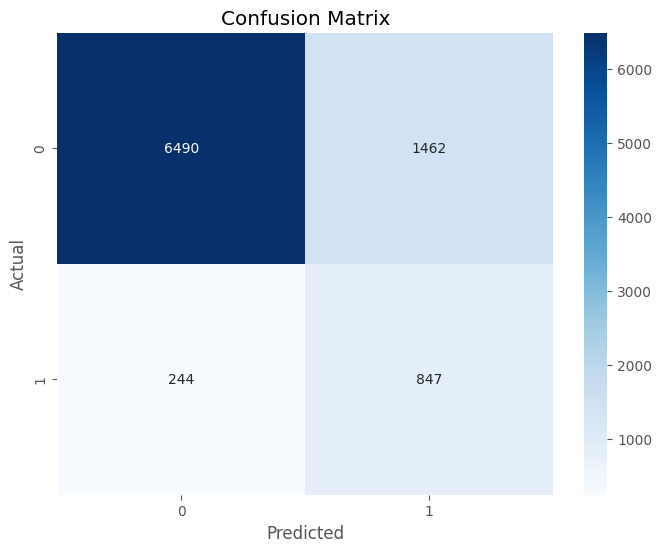


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      7952
           1       0.37      0.78      0.50      1091

    accuracy                           0.81      9043
   macro avg       0.67      0.80      0.69      9043
weighted avg       0.89      0.81      0.84      9043



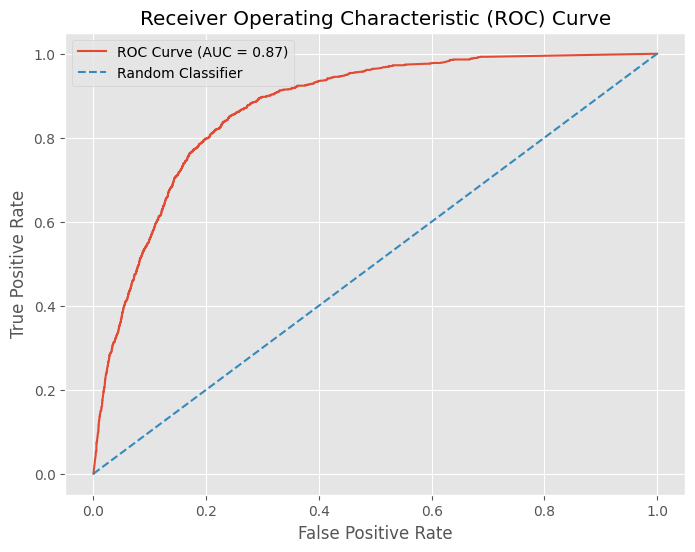


Timing Information:
Total time to run random search: 59.43 seconds
Time per iteration: 2.97 seconds

Top 10 most important features:
               feature  importance
0             duration    0.560652
2              balance    0.099876
3                pdays    0.097252
5      contact_unknown    0.084202
1             campaign    0.071560
6          housing_yes    0.063506
8   education_tertiary    0.008421
7  education_secondary    0.006187
4    contact_telephone    0.005041
9    education_unknown    0.003303


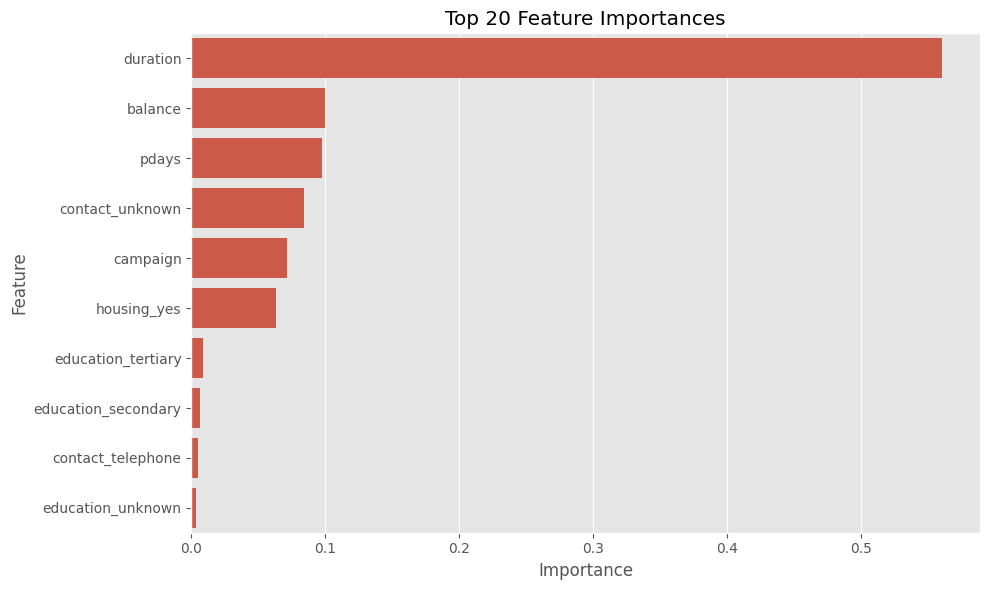

In [180]:
from sklearn.model_selection import RandomizedSearchCV

# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_rf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

2.2 Random Forest (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.6916
Optimal F1 Score: 0.5120

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7952
           1       0.40      0.70      0.51      1091

    accuracy                           0.84      9043
   macro avg       0.68      0.78      0.71      9043
weighted avg       0.89      0.84      0.86      9043



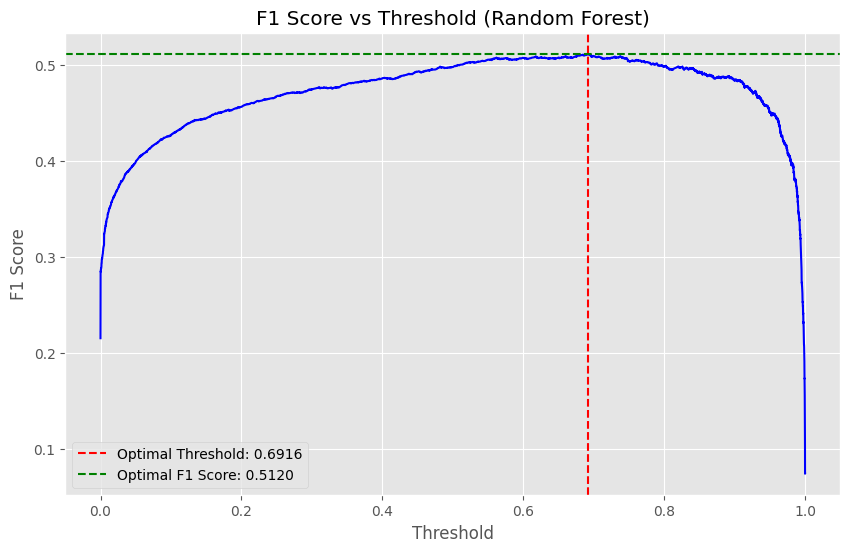

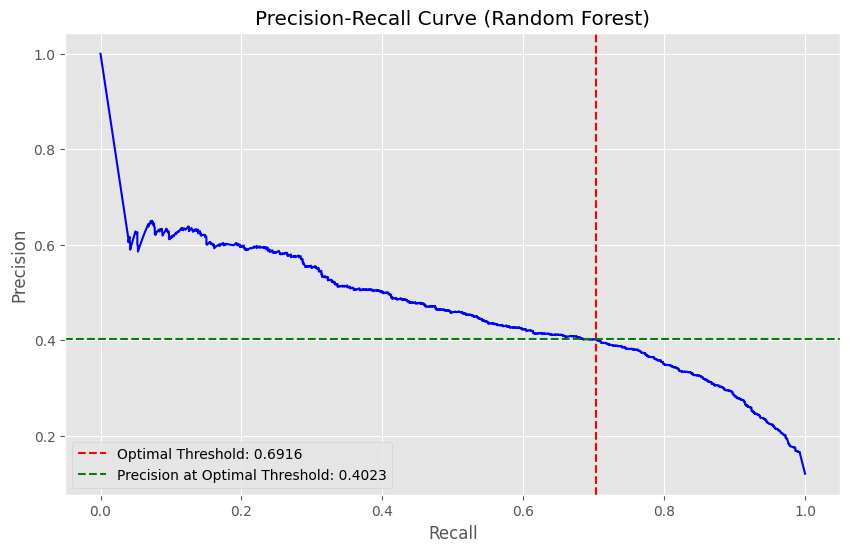


Default Threshold (0.5) F1 Score: 0.4982
Improvement in F1 Score: 0.0138

Metrics at threshold 0.5:
Accuracy: 0.8113
Precision: 0.3668
Recall: 0.7764
F1 Score: 0.4982
ROC AUC Score: 0.8719

Metrics at threshold 0.6916257947320616:
Accuracy: 0.8381
Precision: 0.4023
Recall: 0.7039
F1 Score: 0.5120
ROC AUC Score: 0.8719

Top 10 most important features at optimal threshold:
               feature  importance
0             duration    0.560652
2              balance    0.099876
3                pdays    0.097252
5      contact_unknown    0.084202
1             campaign    0.071560
6          housing_yes    0.063506
8   education_tertiary    0.008421
7  education_secondary    0.006187
4    contact_telephone    0.005041
9    education_unknown    0.003303


<Figure size 1000x600 with 0 Axes>

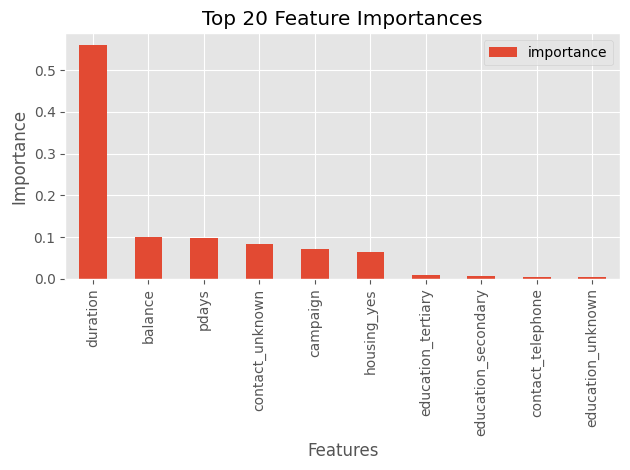

In [181]:
# Get predicted probabilities
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (Random Forest)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3.1 AdaBoost

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'learning_rate': 1.0}
Best cross-validation score: 0.9485407652611203

Performance Scores:
Accuracy: 0.8150
Precision: 0.3740
Recall: 0.7919
F1 Score: 0.5081
ROC AUC Score: 0.8773


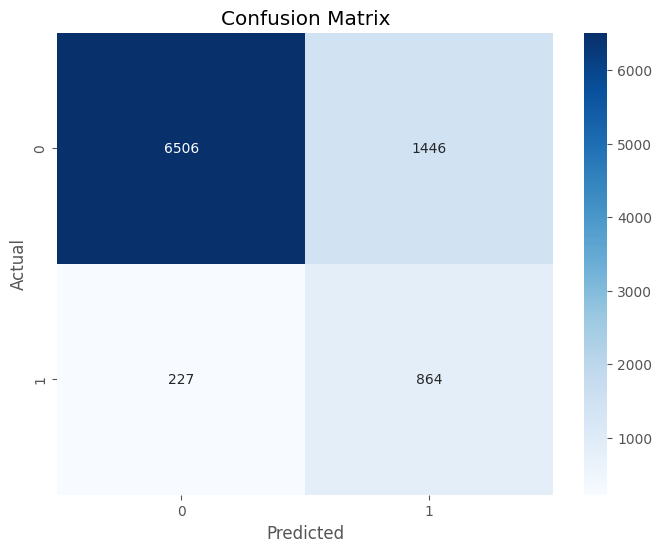


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7952
           1       0.37      0.79      0.51      1091

    accuracy                           0.81      9043
   macro avg       0.67      0.81      0.70      9043
weighted avg       0.89      0.81      0.84      9043



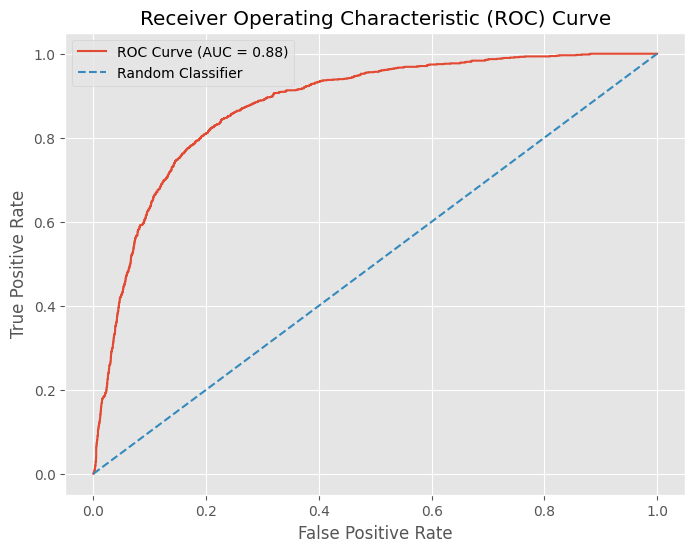


Timing Information:
Total time to run random search: 54.37 seconds
Time per iteration: 5.44 seconds

Top 10 most important features:
               feature  importance
0             duration    0.380495
2              balance    0.249324
3                pdays    0.132008
1             campaign    0.115026
6          housing_yes    0.033054
5      contact_unknown    0.023415
7  education_secondary    0.019824
8   education_tertiary    0.019803
9    education_unknown    0.015515
4    contact_telephone    0.011536


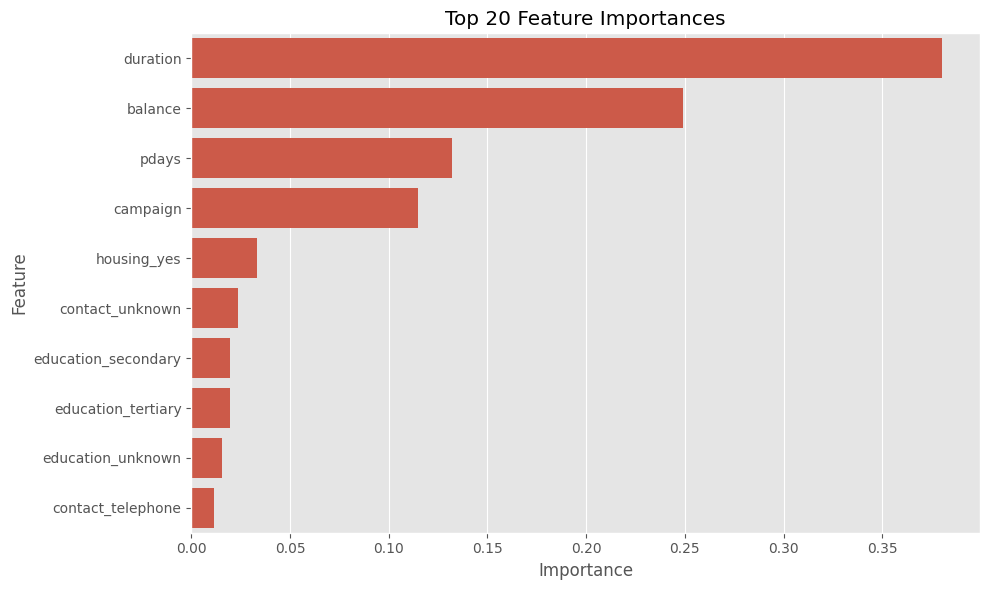

In [182]:
from sklearn import __version__ as sklearn_version


# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

# Create the AdaBoost classifier based on scikit-learn version
if sklearn_version >= "0.22":
    adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)
else:
    adaboost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    adaboost,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_adaboost = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_adaboost.predict(X_test)
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

3.2 Adaboost (Threshold adjusted for the highest F1 score)

Optimal Threshold: 0.7052
Optimal F1 Score: nan

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043



C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\1590642139.py:8: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


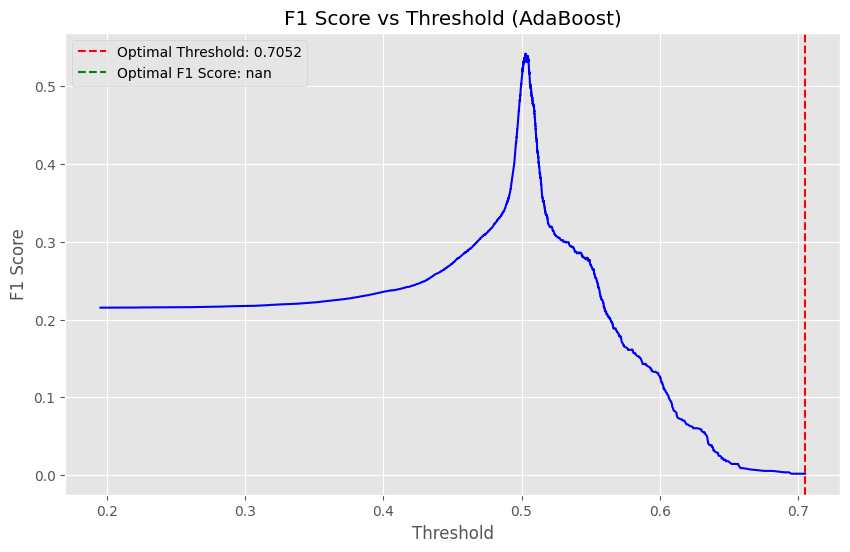

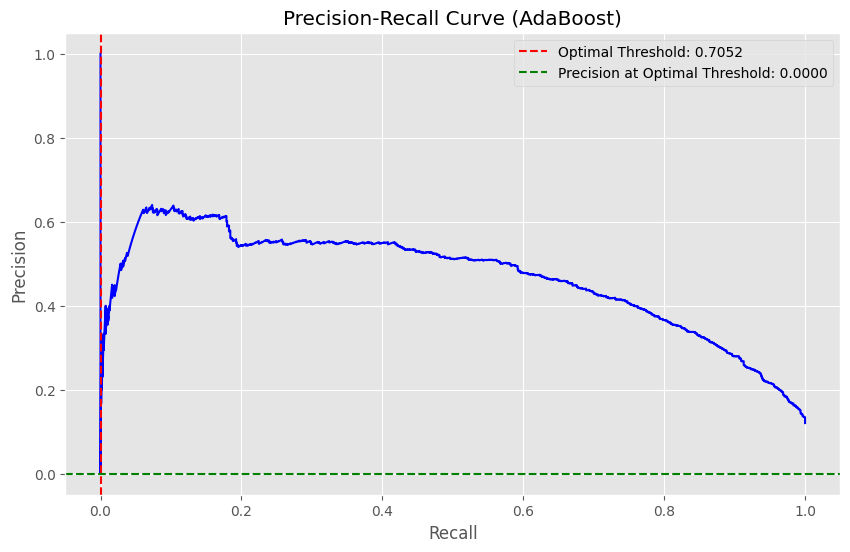


Default Threshold (0.5) F1 Score: 0.5081
Improvement in F1 Score: nan

Metrics at threshold 0.5:
Accuracy: 0.8150
Precision: 0.3740
Recall: 0.7919
F1 Score: 0.5081
ROC AUC Score: 0.8773

Metrics at threshold 0.7052472957639925:
Accuracy: 0.8791
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.8773

Top 10 most important features at optimal threshold:
               feature  importance
0             duration    0.380495
2              balance    0.249324
3                pdays    0.132008
1             campaign    0.115026
6          housing_yes    0.033054
5      contact_unknown    0.023415
7  education_secondary    0.019824
8   education_tertiary    0.019803
9    education_unknown    0.015515
4    contact_telephone    0.011536


<Figure size 1000x600 with 0 Axes>

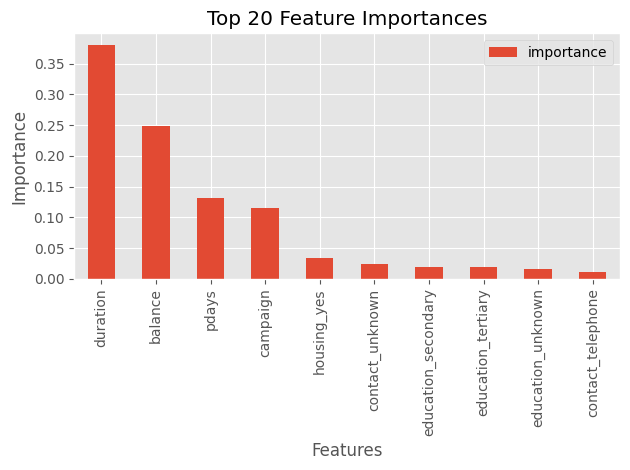

In [183]:
# Get predicted probabilities
y_pred_proba = best_adaboost.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
optimal_f1_score = f1_scores[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

# Apply the optimal threshold to get predictions
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate and print the classification report with the optimal threshold
print("\nClassification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Plot F1 score vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores[:-1], 'b-')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold (AdaBoost)')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
plt.legend()
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, 'b-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AdaBoost)')
plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
plt.legend()
plt.show()

# Compare with default threshold (0.5)
y_pred_default = (y_pred_proba >= 0.5).astype(int)
default_f1_score = f1_score(y_test, y_pred_default)

print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, threshold):
    print(f"\nMetrics at threshold {threshold}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

# Print metrics for default and optimal thresholds
print_metrics(y_test, y_pred_default, 0.5)
print_metrics(y_test, y_pred_optimal, optimal_threshold)

# Feature importance at optimal threshold
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': best_adaboost.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features at optimal threshold:")
print(feature_importance.head(10))

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance.head(20).plot(x='feature', y='importance', kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

4.1 Bagging Classifier

Shape of X_train: (48960, 10)
Shape of y_train: (48960,)
Best parameters: {'n_estimators': 100, 'max_samples': 0.7, 'max_features': 0.7, 'bootstrap_features': False, 'bootstrap': False}
Best cross-validation score: 0.9685164792329656

Performance Scores:
Accuracy: 0.8289
Precision: 0.3928
Recall: 0.7654
F1 Score: 0.5191
ROC AUC Score: 0.8785


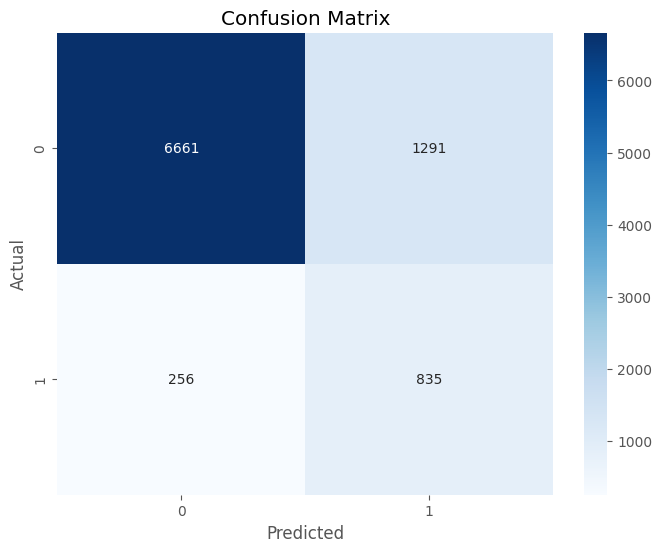


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      7952
           1       0.39      0.77      0.52      1091

    accuracy                           0.83      9043
   macro avg       0.68      0.80      0.71      9043
weighted avg       0.89      0.83      0.85      9043



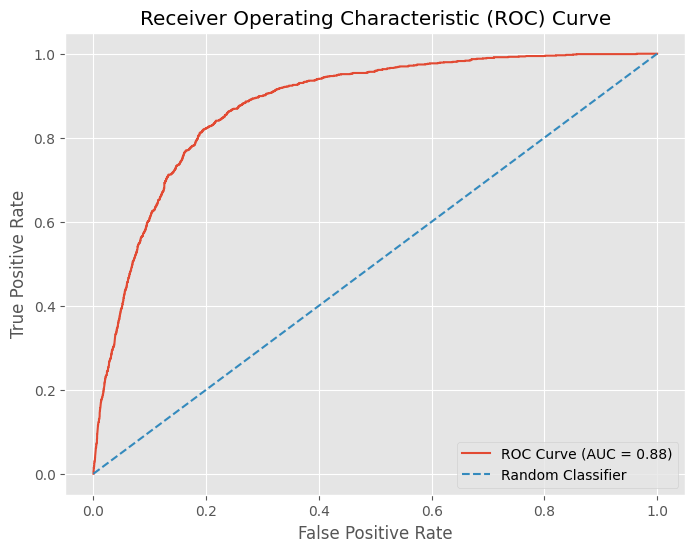


Timing Information:
Total time to run random search: 50.41 seconds
Time per iteration: 5.04 seconds
An error occurred: All arrays must be of the same length
Please check your data preparation steps and ensure X_train and y_train have the same number of samples.


In [184]:
from sklearn import __version__ as sklearn_version

# Check shapes of X_train and y_train
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

if X_train.shape[0] != y_train.shape[0]:
    raise ValueError("The number of samples in X_train and y_train do not match. Please check your data preparation steps.")

# Define a simplified parameter distribution for random search
param_dist = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create the Bagging classifier based on scikit-learn version
if sklearn_version >= "0.22":
    bagging = BaggingClassifier(estimator=base_estimator, random_state=42)
else:
    bagging = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Create the random search object with fewer iterations
random_search = RandomizedSearchCV(
    bagging,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
try:
    start_time = time.time()
    random_search.fit(X_train, y_train)
    end_time = time.time()

    # Print the best parameters and score
    print("Best parameters:", random_search.best_params_)
    print("Best cross-validation score:", random_search.best_score_)

    # Get the best model
    best_bagging = random_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_bagging.predict(X_test)
    y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print("\nPerformance Scores:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Timing Information
    total_time = end_time - start_time
    n_iter = random_search.n_iter
    time_per_iter = total_time / n_iter

    print("\nTiming Information:")
    print(f"Total time to run random search: {total_time:.2f} seconds")
    print(f"Time per iteration: {time_per_iter:.2f} seconds")

    # Feature Importance (using mean feature importance of base estimators)
    feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'importance': feature_importance
    })
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print("\nTop 10 most important features:")
    print(feature_importance_df.head(10))

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"An error occurred: {e}")
    print("Please check your data preparation steps and ensure X_train and y_train have the same number of samples.")

4.2 Bagging Classifier (Threshold adjusted for the highest F1 score)

Shape of X_test: (9043, 10)
Shape of y_test: (9043,)
Shape of y_pred_proba: (9043,)
Optimal Threshold: 0.5810
Optimal F1 Score: 0.5312

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7952
           1       0.43      0.70      0.53      1091

    accuracy                           0.85      9043
   macro avg       0.69      0.79      0.72      9043
weighted avg       0.89      0.85      0.87      9043



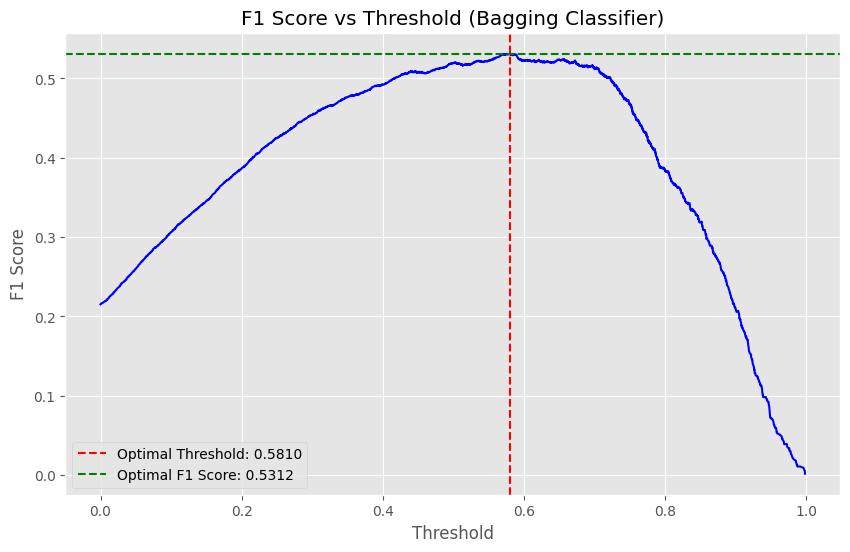

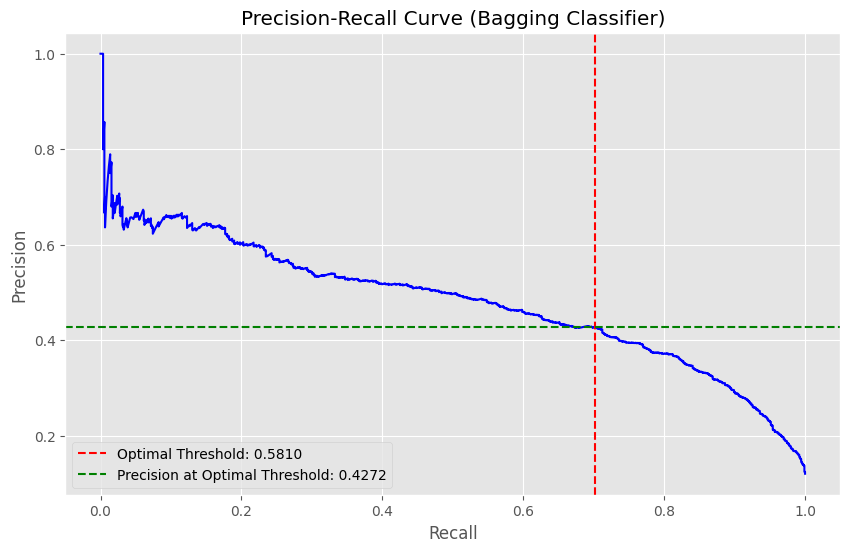


Default Threshold (0.5) F1 Score: 0.5196
Improvement in F1 Score: 0.0116

Metrics at threshold 0.5:
Accuracy: 0.8290
Precision: 0.3930
Recall: 0.7663
F1 Score: 0.5196
ROC AUC Score: 0.8785

Metrics at threshold 0.5809685692207558:
Accuracy: 0.8505
Precision: 0.4272
Recall: 0.7021
F1 Score: 0.5312
ROC AUC Score: 0.8785
An error occurred: All arrays must be of the same length
Please check your data and ensure all arrays have the same length.


In [185]:
# Check shapes
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

if X_test.shape[0] != y_test.shape[0]:
    raise ValueError("Mismatch in the number of samples between X_test and y_test")

try:
    # Get predicted probabilities
    y_pred_proba = best_bagging.predict_proba(X_test)[:, 1]
    
    print("Shape of y_pred_proba:", y_pred_proba.shape)
    
    if y_pred_proba.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch in the number of samples between y_pred_proba and y_test")

    # Calculate precision, recall, and thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Calculate F1 score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)  # Replace NaN with 0

    # Find the index of the maximum F1 score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_f1_score = f1_scores[optimal_idx]

    print(f"Optimal Threshold: {optimal_threshold:.4f}")
    print(f"Optimal F1 Score: {optimal_f1_score:.4f}")

    # Apply the optimal threshold to get predictions
    y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

    # Calculate and print the classification report with the optimal threshold
    print("\nClassification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_optimal))

    # Plot F1 score vs threshold
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores[:-1], 'b-')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score vs Threshold (Bagging Classifier)')
    plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.axhline(y=optimal_f1_score, color='g', linestyle='--', label=f'Optimal F1 Score: {optimal_f1_score:.4f}')
    plt.legend()
    plt.show()

    # Plot Precision-Recall curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, 'b-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Bagging Classifier)')
    plt.axvline(x=recall[optimal_idx], color='r', linestyle='--', label=f'Optimal Threshold: {optimal_threshold:.4f}')
    plt.axhline(y=precision[optimal_idx], color='g', linestyle='--', label=f'Precision at Optimal Threshold: {precision[optimal_idx]:.4f}')
    plt.legend()
    plt.show()

    # Compare with default threshold (0.5)
    y_pred_default = (y_pred_proba >= 0.5).astype(int)
    default_f1_score = f1_score(y_test, y_pred_default)

    print(f"\nDefault Threshold (0.5) F1 Score: {default_f1_score:.4f}")
    print(f"Improvement in F1 Score: {optimal_f1_score - default_f1_score:.4f}")

    # Function to calculate and print metrics
    def print_metrics(y_true, y_pred, y_pred_proba, threshold):
        print(f"\nMetrics at threshold {threshold}:")
        print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
        print(f"Precision: {precision_score(y_true, y_pred):.4f}")
        print(f"Recall: {recall_score(y_true, y_pred):.4f}")
        print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
        print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred_proba):.4f}")

    # Print metrics for default and optimal thresholds
    print_metrics(y_test, y_pred_default, y_pred_proba, 0.5)
    print_metrics(y_test, y_pred_optimal, y_pred_proba, optimal_threshold)

    # Feature importance (using mean feature importance of base estimators)
    feature_importance = np.mean([tree.feature_importances_ for tree in best_bagging.estimators_], axis=0)
    feature_importance_df = pd.DataFrame({
        'feature': X_test.columns,
        'importance': feature_importance
    })
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

    print("\nTop 10 most important features at optimal threshold:")
    print(feature_importance_df.head(10))

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    feature_importance_df.head(20).plot(x='feature', y='importance', kind='bar')
    plt.title('Top 20 Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"An error occurred: {e}")
    print("Please check your data and ensure all arrays have the same length.")
except AttributeError as e:
    print(f"An AttributeError occurred: {e}")
    print("This might be because 'best_bagging' is not defined. Make sure you've run the Bagging Classifier random search code first.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    print("Please check your code and data for any issues.")

5. Voting Classifier (soft voting)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.9636197487638448

Performance Scores:
Accuracy: 0.7868
Precision: 0.3431
Recall: 0.8387
F1 Score: 0.4870
ROC AUC Score: 0.8773


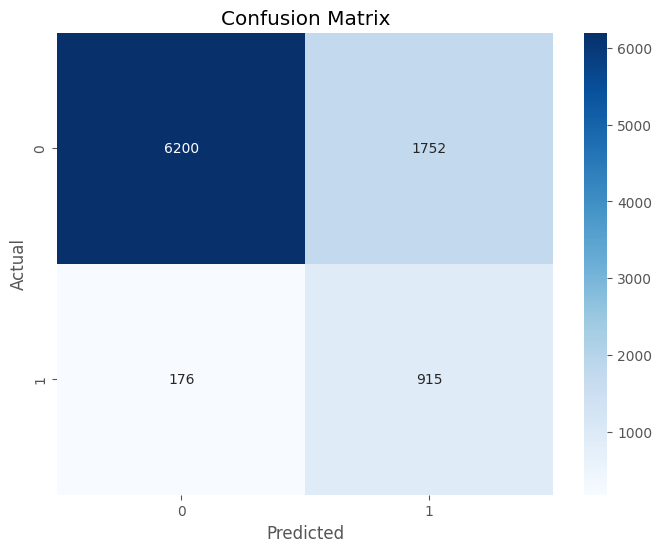


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7952
           1       0.34      0.84      0.49      1091

    accuracy                           0.79      9043
   macro avg       0.66      0.81      0.68      9043
weighted avg       0.90      0.79      0.82      9043



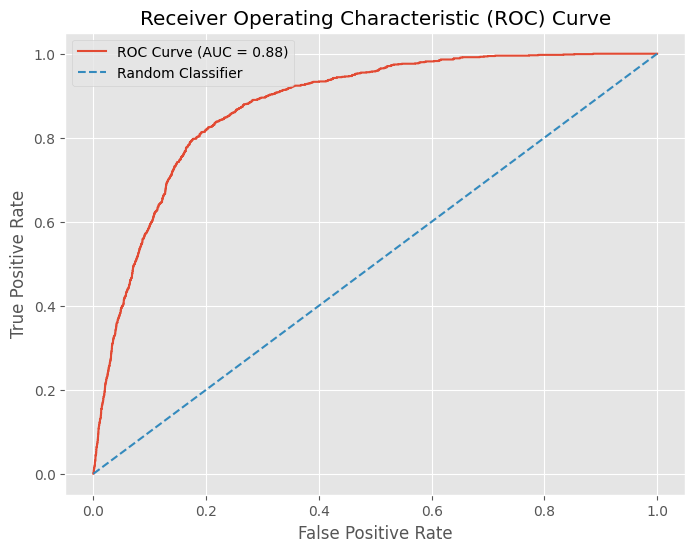


Timing Information:
Total time to run random search: 8.38 seconds
Time per iteration: 0.84 seconds

Note: Voting Classifier doesn't provide direct feature importance.
To get feature importance, you would need to examine each base model separately.


In [186]:
# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='soft'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)
y_pred_proba = best_voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

# Note: Voting Classifier doesn't have built-in feature importance
print("\nNote: Voting Classifier doesn't provide direct feature importance.")
print("To get feature importance, you would need to examine each base model separately.")

    In a voting classifier, individual models (classifiers) make predictions, and the final prediction is based on some form of voting. Adjusting the decision threshold for classification applies to individual models and not directly to the voting classifier itself.
    Hence, for the soft voting, we optimize weights for the base classifiers, giving more influence to models that better optimize F1 score.

5. Voting Classifier (hard voting)

c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NeilXu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\NeilXu\Ap

Best parameters: {'lr__penalty': 'l2', 'lr__C': 10, 'knn__weights': 'distance', 'knn__n_neighbors': 5, 'dt__min_samples_split': 5, 'dt__max_depth': 7}
Best cross-validation score: 0.9489927869146101

Performance Scores:
Accuracy: 0.7888
Precision: 0.3465
Recall: 0.8469
F1 Score: 0.4918


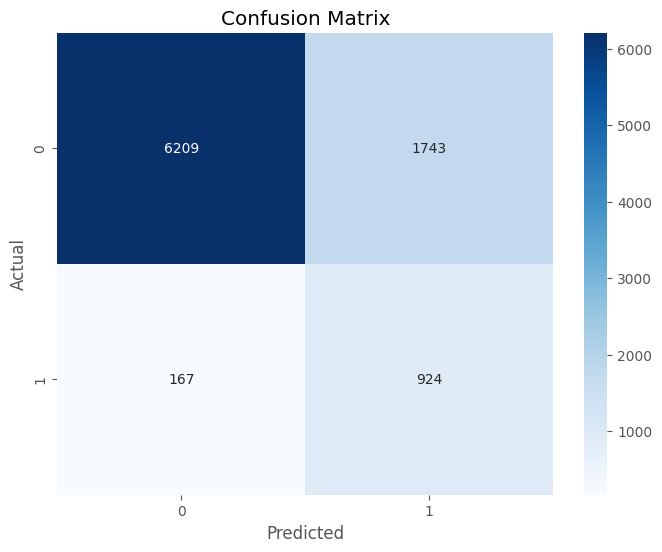


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      7952
           1       0.35      0.85      0.49      1091

    accuracy                           0.79      9043
   macro avg       0.66      0.81      0.68      9043
weighted avg       0.90      0.79      0.82      9043


Timing Information:
Total time to run random search: 10.28 seconds
Time per iteration: 1.03 seconds

Note: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.


In [187]:
# Define base models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)

# Create the Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('knn', knn), ('dt', dt)],
    voting='hard'
)

# Define parameter distributions for random search
param_dist = {
    'lr__C': [0.1, 1, 10],
    'lr__penalty': ['l1', 'l2'],
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'dt__max_depth': [3, 5, 7, None],
    'dt__min_samples_split': [2, 5, 10]
}

# Create the random search object
random_search = RandomizedSearchCV(
    voting_clf,
    param_distributions=param_dist,
    n_iter=10,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

# Perform random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Get the best model
best_voting_clf = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nPerformance Scores:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Timing Information
total_time = end_time - start_time
n_iter = random_search.n_iter
time_per_iter = total_time / n_iter

print("\nTiming Information:")
print(f"Total time to run random search: {total_time:.2f} seconds")
print(f"Time per iteration: {time_per_iter:.2f} seconds")

print("\nNote: Hard Voting Classifier doesn't provide probability estimates, so ROC AUC score and ROC curve cannot be computed.")

    Hard voting uses final predictions, not probabilities. Thus, changing the threshold for individual classifiers is not  applicable to improving the F1 score in hard voting

# Part 4: Performance Comparison

1. Time Required to Run

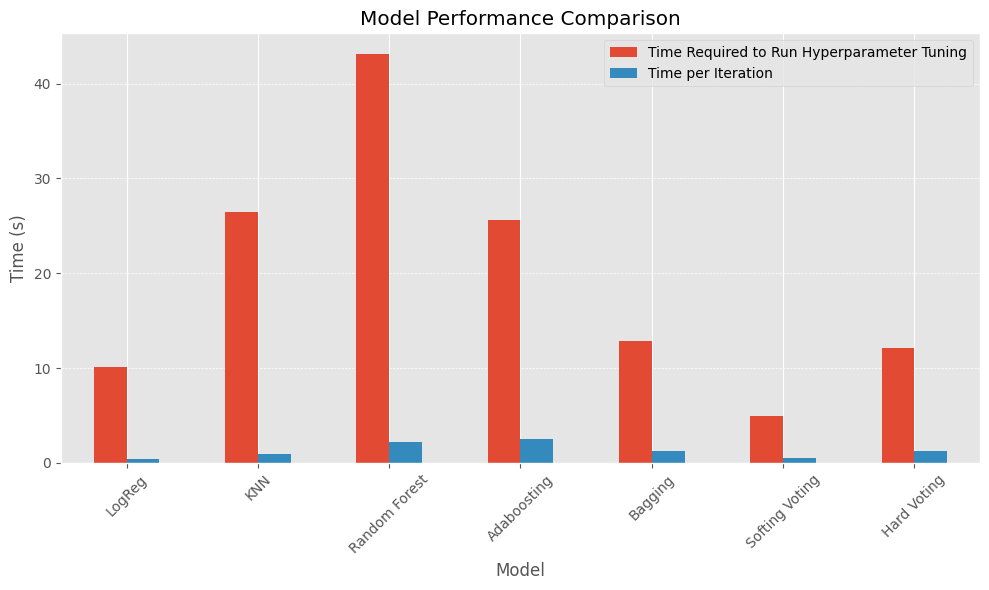

In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data
data = {
    'Model': ['LogReg', 'KNN', 'Random Forest', 'Adaboosting', 'Bagging', 'Softing Voting', 'Hard Voting'],
    'Time Required to Run Hyperparameter Tuning': [10.09, 26.41, 43.14, 25.58, 12.84, 4.94, 12.1],
    'Time per Iteration': [0.42, 0.94, 2.16, 2.56, 1.28, 0.49, 1.21]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set index to 'Model' to better manage the plot
df.set_index('Model', inplace=True)

# Plotting the data
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Time (s)')
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Model')
plt.xticks(rotation=45)
plt.grid(visible=True, axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show plot
plt.show()



2. Performance Score

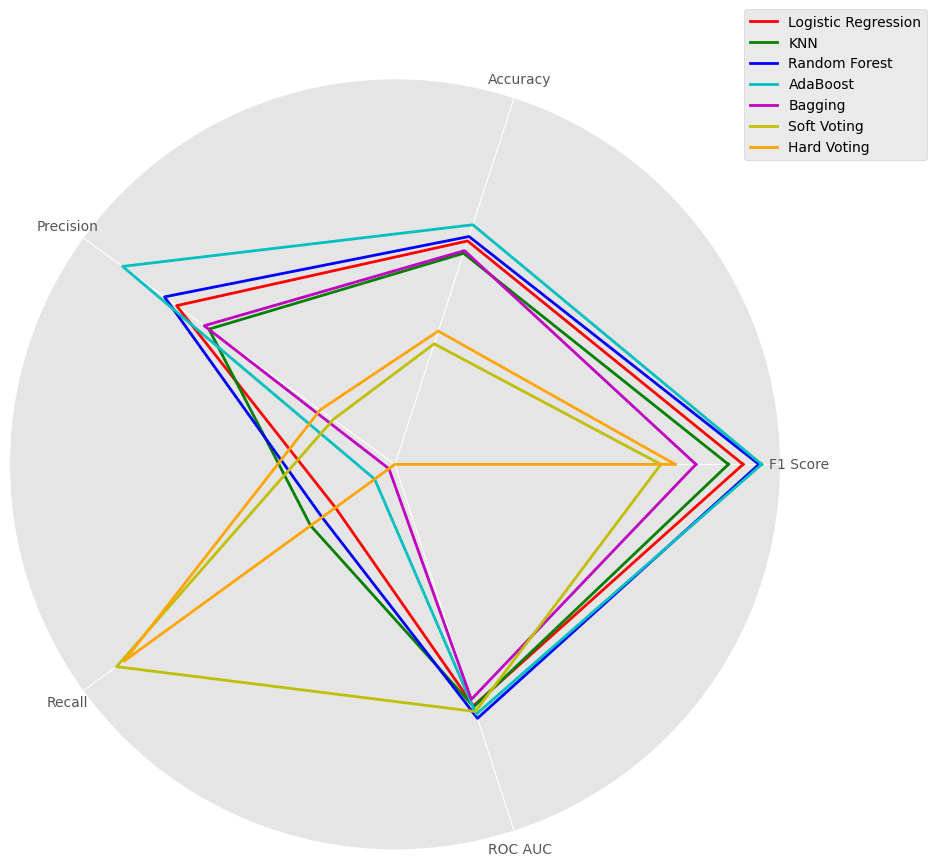

In [189]:
from math import pi

# Define the models and their performance metrics
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging', 'Soft Voting', 'Hard Voting']
f1_score = [0.5700, 0.5586, 0.5823, 0.5844, 0.5334, 0.5062, 0.5173]
accuracy = [0.8822, 0.8721, 0.8858, 0.8954, 0.8743, 0.7983, 0.8087]
precision = [0.5094, 0.4784, 0.5210, 0.5612, 0.4829, 0.3592, 0.3718]
recall = [0.6471, 0.6709, 0.6599, 0.6095, 0.5958, 0.8570, 0.8497]
roc_auc = [0.8970, 0.8977, 0.9071, 0.9038, 0.8917, 0.9016, 0.7]  # ROC AUC missing for Hard Voting (set to 0.7)

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'F1 Score': f1_score,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'ROC AUC': roc_auc
})

# Function to plot radar chart
def create_radar_chart(categories, values, label, color):
    # Number of variables we're plotting
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Ensure the chart closes itself
    
    # Initialise radar chart
    ax = plt.subplot(111, polar=True)
    
    # Hide the frame
    ax.spines['polar'].set_visible(False)
    
    # Draw one axis per variable
    plt.xticks(angles[:-1], categories)
    
    # Hide the labels on each axis (keep ticklines)
    ax.yaxis.set_ticks([])
    
    # Plot data without filling the area
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label, color=color)

# Create radar chart for each model
plt.figure(figsize=(10, 10))

# Define performance metrics to compare
categories = ['F1 Score', 'Accuracy', 'Precision', 'Recall', 'ROC AUC']

# Adjust the ranges for each axis
ranges = {
    'F1 Score': (0.3, 0.6),
    'Accuracy': (0.7, 1.0),
    'Precision': (0.3, 0.6),
    'Recall': (0.59, 0.89),
    'ROC AUC': (0.7, 1.0)
}

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange']

# Plot radar charts for each model
for i, model in enumerate(models):
    values = [
        (f1_score[i] - ranges['F1 Score'][0]) / (ranges['F1 Score'][1] - ranges['F1 Score'][0]),
        (accuracy[i] - ranges['Accuracy'][0]) / (ranges['Accuracy'][1] - ranges['Accuracy'][0]),
        (precision[i] - ranges['Precision'][0]) / (ranges['Precision'][1] - ranges['Precision'][0]),
        (recall[i] - ranges['Recall'][0]) / (ranges['Recall'][1] - ranges['Recall'][0]),
        (roc_auc[i] - ranges['ROC AUC'][0]) / (ranges['ROC AUC'][1] - ranges['ROC AUC'][0]),
    ]
    
    create_radar_chart(categories, values, label=models[i], color=colors[i])

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Show plot
plt.show()

C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\31705851.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\31705851.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
C:\Users\NeilXu\AppData\Local\Temp\ipykernel_12008\31705851.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')


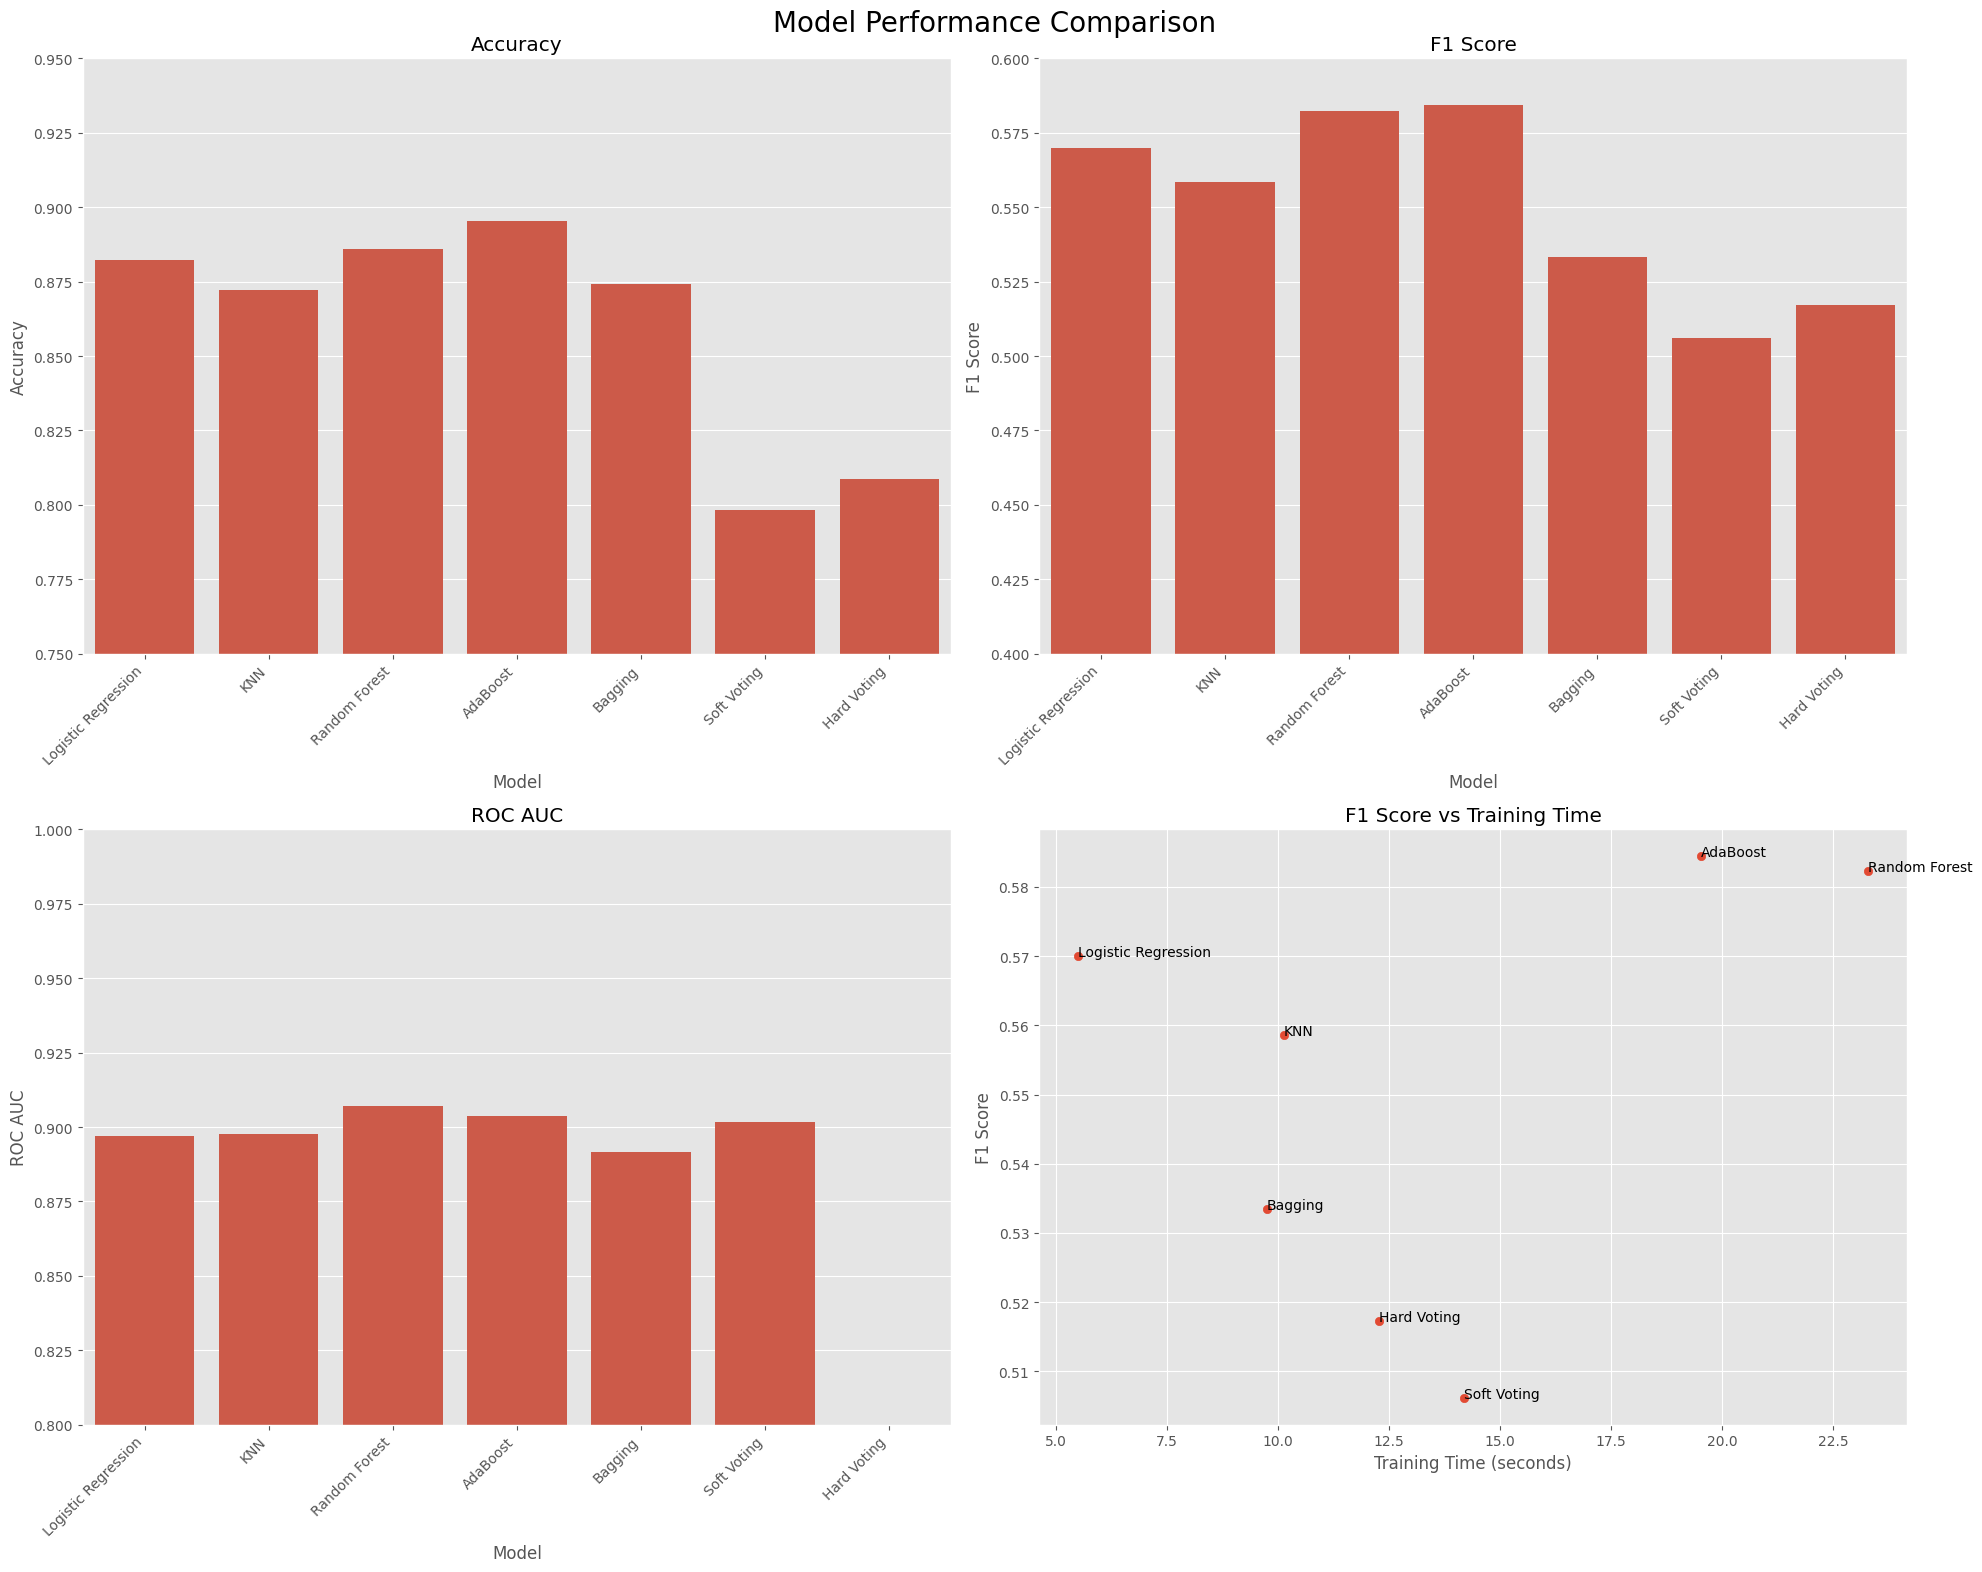

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define the models and their performance metrics
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging', 'Soft Voting', 'Hard Voting']
accuracy = [0.8822, 0.8721, 0.8858, 0.8954, 0.8743, 0.7983, 0.8087]
precision = [0.5094, 0.4784, 0.5210, 0.5612, 0.4829, 0.3592, 0.3718]
recall = [0.6471, 0.6709, 0.6599, 0.6095, 0.5958, 0.8570, 0.8497]
f1_score = [0.5700, 0.5586, 0.5823, 0.5844, 0.5334, 0.5062, 0.5173]
roc_auc = [0.8970, 0.8977, 0.9071, 0.9038, 0.8917, 0.9016, np.nan]  # np.nan for Hard Voting
training_time = [5.50, 10.13, 23.28, 19.52, 9.74, 14.19, 12.28]

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc,
    'Training Time': training_time
})

# Set up the plot style
plt.style.use('ggplot')  # Changed style to 'ggplot'
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Model Performance Comparison', fontsize=20)

# Plot Accuracy with scaled y-axis (0.7 - 1.0)
sns.barplot(x='Model', y='Accuracy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0.75, 0.95)  # Set the scale for Accuracy
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Plot F1 Score with scaled y-axis (0.3 - 0.6)
sns.barplot(x='Model', y='F1 Score', data=df, ax=axes[0, 1])
axes[0, 1].set_title('F1 Score')
axes[0, 1].set_ylim(0.4, 0.6)  # Set the scale for F1 Score
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot ROC AUC
sns.barplot(x='Model', y='ROC AUC', data=df, ax=axes[1, 0])
axes[1, 0].set_title('ROC AUC')
axes[1, 0].set_ylim(0.8, 1)  # Set the scale for ROC AUC
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Plot F1 Score vs Training Time
axes[1, 1].scatter(df['Training Time'], df['F1 Score'])
for i, model in enumerate(models):
    axes[1, 1].annotate(model, (df['Training Time'][i], df['F1 Score'][i]))
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_title('F1 Score vs Training Time')

plt.tight_layout()
plt.show()

3. Evaluate the Models by considering time to run and F1 score collectively

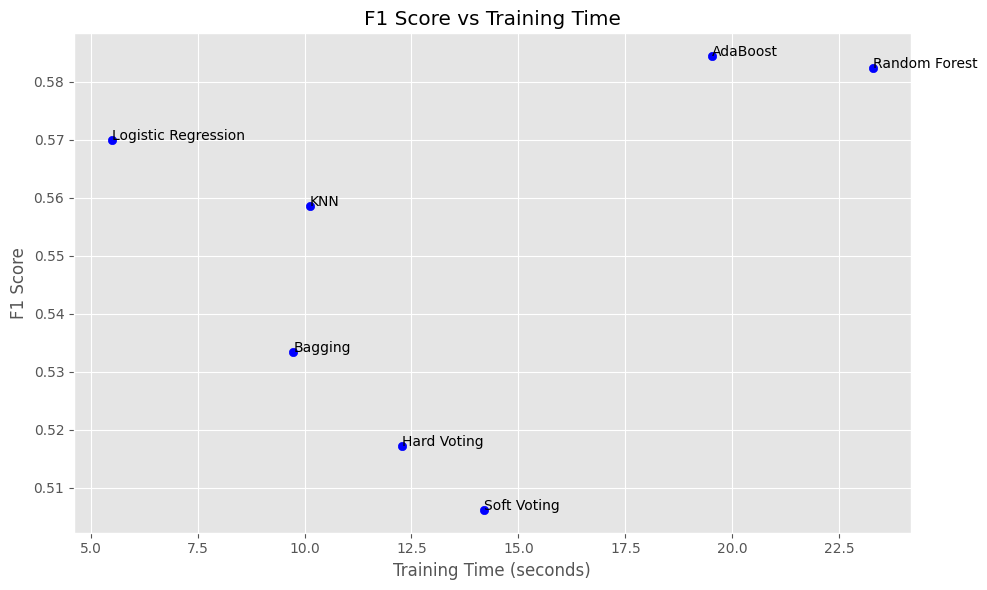

In [191]:
# Define the models and their performance metrics
models = ['Logistic Regression', 'KNN', 'Random Forest', 'AdaBoost', 'Bagging', 'Soft Voting', 'Hard Voting']
f1_score = [0.5700, 0.5586, 0.5823, 0.5844, 0.5334, 0.5062, 0.5173]
training_time = [5.50, 10.13, 23.28, 19.52, 9.74, 14.19, 12.28]

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'F1 Score': f1_score,
    'Training Time': training_time
})

# Plot F1 Score vs Training Time
plt.figure(figsize=(10, 6))
plt.scatter(df['Training Time'], df['F1 Score'], color='b')
for i, model in enumerate(models):
    plt.annotate(model, (df['Training Time'][i], df['F1 Score'][i]))
plt.xlabel('Training Time (seconds)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Training Time')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 5: Interpretation and Justification

1. Why did the ensemble models perform the way they did?

2. If you had to pick one model to implement in business process, which would it be and why?

3. What decision criteria did you use to arrive at this conclusion?